<img hfre>

# Data Dictionary
**Churn** = dict_churn_categories_numeric = {'Churn':{'No':0,'Yes':1}}
<br>
<br>
**Area** = dict_area_categories_numeric = {"Area":{'Urban':0, 'Suburban':1, 'Rural':2}}
<br>
<br>
**Education** = dict_education_categories_numeric = {'Education': {
    'Doctorate Degree':22,
    "Master's Degree":19,
    "Bachelor's Degree":16,
    "Associate's Degree":14, 
    'Some College, 1 or More Years, No Degree':13,
    'Some College, Less than 1 Year':13,
    'Professional School Degree':12, 
    'Regular High School Diploma':12,
    'GED or Alternative Credential':10,
    '9th Grade to 12th Grade, No Diploma':10,
    'Nursery School to 8th Grade':8,
    'No Schooling Completed':0, 
}}
<br>
<br>
**Marital** = dict_marital_categories_numeric = {'Marital':{
    'Never Married':0,
    'Married':1,
    'Widowed':2,
    'Separated':3,
    'Divorced':4}}    
<br>
<br>
**Contract** = dict_contract_categories_numeric = {'Contract': {'Month-to-month':0,'One year':1, 'Two Year':2}}
**Techie** = dict_techie_categories_numeric = {'Techie': {'No':0,'Yes':1,'unknown':2}}<br><br>
**Port_modem** = dict_port_modem_categories_numeric = {'Port_modem':{'No':0,'Yes':1}}<br><br>
**Tablet** = dict_tablet_categories_numeric = {'Tablet': {'No':0,'Yes':1}}<br><br>
**InternetService** = dict_internet_service_categories_numeric = {'InternetService': {'Fiber Optic':2, 'DSL':1, 'None':0}}<br><br>
**Phone** = dict_phone_categories_numeric = {'Phone':{'No':0, 'Yes':1, 'unknown':2}}<br><br>
**Multiple** = dict_multiple_categories_numeric = {'Multiple':{'No':0, 'Yes':1}}<br><br>
**OnlineSecurity** = dict_online_security_categories_numeric = {'OnlineSecurity':{'No':0,'Yes':1}}<br><br>
**DeviceProtection** = dict_online_backup_categories_numeric = {'OnlineBackup':{'No':0,'Yes':1}}<br><br>
**DeviceProtection** = dict_device_protection_categories_numeric = {'DeviceProtection':{'No':0,'Yes':1}}<br><br>
**TechSupport** = dict_tech_support_categories_numeric = {'TechSupport':{'No':0, 'Yes':1, 'unknown':2}}<br><br>
**StreamingTV** = dict_streamingtv_categories_numeric = {'StreamingTV':{'No':0, 'Yes':1}}<br><br>
**StreamingTV** = dict_streamingtv_categories_numeric = {'StreamingTV':{'No':0, 'Yes':1}}<br><br>
**StreamingMovies** = dict_streaming_movies_categories_numeric = {'StreamingMovies':{'No':0, 'Yes':1}}<br><br>
**PaperlessBilling** = dict_paperless_billing_categories_numeric = {'PaperlessBilling':{'No':0, 'Yes':1}}<br><br>

# Part I: Research Question
<br><br>

## A.  Describe one question or decision that you will address using the data set you chose. The summarized question or decision must be relevant to a realistic organizational need or situation.
<br><br>
### **How do we identify customers that might churn?**
<br><br>


## B.  Describe the variables in the data set and indicate the specific type of data being described. Use examples from the data set that support your claims.
<br><br>

In [10]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA



# %matplotlib inline
# %matplotlib notebook

In [12]:
df = pd.read_csv('churn_raw_data.csv',index_col=0)

In [13]:
df.head()

CaseOrder Customer_id                           Interaction         City  \
1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b  Point Baker   
2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524  West Branch   
3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35      Yamhill   
4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311      Del Mar   
5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574    Needville   

  State                 County    Zip       Lat        Lng  Population  ...  \
1    AK  Prince of Wales-Hyder  99927  56.25100 -133.37571          38  ...   
2    MI                 Ogemaw  48661  44.32893  -84.24080       10446  ...   
3    OR                Yamhill  97148  45.35589 -123.24657        3735  ...   
4    CA              San Diego  92014  32.96687 -117.24798       13863  ...   
5    TX              Fort Bend  77461  29.38012  -95.80673       11352  ...   

  MonthlyCharge Bandwidth_GB_Year item1  item2  item3 item4 item5  item6  \
1    171.449762        904.536110     5      5      5     3     4      4   
2    242.948015        800.982766     3      4      3     3     4      3   
3    159.440398       2054.706961     4      4      2     4     4      3   
4    120.249493       2164.579412     4      4      4     2     5      4   
5    150.761216        271.493436     4      4      4     3     4      4   

  item7 item8  
1     3     4  
2     4     4  
3     3     3  
4     3     3  
5     4     5  

[5 rows x 51 columns]

In [14]:
df.shape

(10000, 51)

In [15]:
## add comment
pd.set_option('display.max_columns', None)

print(df)

       CaseOrder Customer_id                           Interaction  \
1              1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2              2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3              3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5              5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...         ...                                   ...   
9996        9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9997        9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9998        9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9999        9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

               City State                 County    Zip       Lat        Lng  \
1       Point Baker    AK  Prince of Wales-Hyder  99927  56.25100 -133.37571   

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education          

# Description of Data Variables

 **Unnamed:** Is an int that is a 1 based index that I intend to change to a zero based index.
 
 **CaseOrder:** Is an int that preserves the order of the original file.              
 
 **Customer_id:** Is an string that contains letters and numbers that is a unique identifier.   
 
 
 **Interaction:** Is an string that is a unique id that is related to customer interactions with the company through transactions, technical support and customer sign up.            
 
 **City:** Is a string that contains the customers city of residence that is listed on the billing statement. Categorical.                 
 
 **State:** Is a string that contains the customers state of residence that is listed on the billing statement. Categorical.                
 
 **County:** Is a string that contains the customers state of residence that is listed on the billing statement. Categorical.               
 
 **Zip:** Is an int that contains the customers zip code of residence that is listed on the billing statement. Categorical.                  
 
 **Lat:** Is an int that lists the latitude of the customers residence that is listed on the billing statement. Categorical.
 
 **Lng:** Is an int that lists the longitude of the customers residence that is listed on the billing statement. Categorical.                  
 
 **Population:** Is an int that lists the population within a mile radius based on census data. Quantitative.
 
 
 **Area:**  Is a string that describes the area type based on census data. Either rural, urban or suburban. Categorical.
 
 **Timezone:** Is a strong of the time zone of the customer based on sign up information. Categorical.             
 
 **Job:** Is a string that represents the employment of the person being invoiced at sign up time. Categorical. 
 
 
 **Children:** Is an integer that represents the number of children in the household at the time of signup. Categorical.       
 
 **Age:** An int that represents the age of the customer at signup. Categorical.
 
 **Education:** A string of the highest degree the customer had earned at signup. Categorical.
 
 **Employment:** A string of the customers employment status at the time of signup. Categorical.            
 
 **Income:** An int representing the income of the customer at signup. Categorical.              
 
 **Marital:**  A string representing the marital status of the customer at signup. Categorical.              
 
 **Gender:**   A string representing the gender of the customer. Either male, female or non-binary. Categorical.             
 **Churn:** A string representing whether the customer has discontinued service within the last month. Categorical.
 
 **Outage_sec_perweek:** An int representing the number of seconds per week of system outages in the customers neighborhood.    
 
 **Email:** An int representing the number of emails sent to the customer in the last year via marketing or correspondence.                
 
 **Contacts:** An int representing the times a customer contacted customer support.             
 
 **Yearly_equip_failure:**  An int representing the number of times customers equipment failed and needed to be reset or replaced.
 
 **Techie:** Whether the customer considers themselves technically inclined per survey when they signed up. Categorical.       
 
 **Contract:** A string representing the term of the contract. Month-month, one-year and two-year. Categorical. 
 
 
 **Port_modem:** A string representing whether the customer has a portable modem or not. Categorical.            
 
 **Tablet:** A string representing whether the customer has a portable modem or not. Categorical.                
 
 **InternetService:** A string representing the customers type of internet service. DSL, fiber optic or none. Categorical.     
 
 **Phone:** A string representing whether the customer has a phone or not. Categorical.                 
 
 **Multiple:** A string representing whether the customer has multiple lines or not.Categorical.              
 
 **OnlineSecurity:** A string representing whether the customer has online security add-on. Categorical.        
 
 **OnlineBackup:** A string representing whether the customer has an online back-up add-on. Categorical.          
 
 **DeviceProtection:** A string representing whether the customer has device protection add-on. Categorical.      
 
 **TechSupport:** A string representing whether the customer has technical support add-on. Categorical.           
 
 **StreamingTV:** A string representing whether the customer has streaming TV. Categorical.           
 
 **StreamingMovies:** A string representing whether the customer has streaming movies. Categorical.
 
 **PaperlessBilling:**  A string representing whether the customer has paperless billing. Categorical.    
 
 **PaymentMethod:** A string representing the customers payment method and whether it is automatic or not. Categorical.         
 
 **Tenure:** An int representing the number of months the customer has stayed with the provider.                
 
 **MonthlyCharge:** An int that is the average monthly bill the customer receives.         
 
 **Bandwidth_GB_Year:** An int that represents the average GB used per year by the customer.   
 
 ### Eight question customer survey 1 being most important and 8 being least important
 
 **item1:** Timely responses                 
 
 **item2:** Timely Fixes                 
 
 **item3:** Timely Replacements                 
 
 **item4:** Reliability                  
 
 **item5:** Options                 
 
 **item6:** Respectful response                 
 
 **item7:** Courteous exchange                 
 
 **item8:** Evidence of active listening                
 

### Notes on Data:
#### Timezone is data based on sign up whereas other variables are based on the billing statement.
#### Analyzing customers who consider themselves techies and the amount of contacts to customer support.
#### Exploring issues with equipment and their effect on churn.
#### Exploring average amount of bill and its effect on churn.
#### Exploring average amount of bill, add-ons, and income/employment and its effect on churn.
#### Payment method used and its effect on churn.
#### The amount of contact that the company has with the customer and its effect on churn.
#### Analyzing the survey and the level of importance on the interaction with customer service and its effect on churn as well as how many times the customer has been in contact with the company. Might give insight to the level of customer service that customers are receiving.

# Part II: Data-Cleaning Plan
<br><br>

## C.  Explain the plan for cleaning the data by doing the following:


1.  Propose a plan that includes the relevant techniques and specific steps needed to identify anomalies in the data set.
<ul>
    <li>Changing 'unnamed' from a 1 based index to a zero based index and renaming it 'index'.
</li>
    <li>Changing misleading field value
</li>
    <li>Chang NaN values to the Median of the column.</li>
    <li>Re-expressing categorical data as numeric data
</li>
    <li>Standardizing the numeric fields
</li>
    <li>Identifying outliers
</li>
</ul>



<br><br>

2.  Justify your approach for assessing the quality of the data, include:
<p>Characteristics of the data being assessed</p>
<ul>
    <li>Completeness</li>
    <li>Validity</li>
    <li>Consistency</li>
    <li>Integrity</li>
    <li>Unique</li>
</ul>
<p>The completeness of the data. It not having missing values or incorrect data.</p>
<p>The validity of the data. The data is formatted correctly and the data is accurate.</p>
<p>The data is consistent in the ways that it is labeled and represented in a uniform way.</p>
<p>The data is correctly associated with other data that represents the proper meaning </p>
<p>All data is able to be identified and associated with the correct unique source</p>
<p>The data can be attached to a unique index that is associated with the relevant data and a unique customer id. After that the misleading fields values are renamed and replaced with values that are easily understood and relevant to the field. Next re-expressing categorical data as numeric data will allow us to assign meaning and context to data that would otherwise not be as usable. I will need to be careful to accurately re-express the data so as to not corrupt the data. Next standardizing the numeric fields will allow the data to be associated with a numeric value that indicates how many standard deviations the data is away from the mean of the data. With the standardization of the numeric fields I will be able to accurately identify outliers by determining their distance from the mean as well as the number of standard deviations away from the mean.</p>
<br><br>  

3.  Justify your selected programming language and any libraries and packages that will support the data-cleaning process.
#### Python with Pandas, Numpy, matplotlib.pyplot and using the magic inline code for graphs and plots.
##### I chose Python as I am already somewhat knowledgeable with python as it pertains to data science and it is a very good generalist language that has a ton of tools and support for data science and analytics through its libraries, packages and modules. It has a vast community that is active and always helpful whenever help is needed. There are thousands of resources for Python and data analytics should a problem arise that I do not know how to solve. 

<br>
<br>



4.  Provide the code you will use to identify the anomalies in the data.

<br><br>

## Changing unnamed to 'index' and making it a zero based index.

In [17]:
df.rename(columns={('Unnamed: 0'): ('Index')}, inplace=True)
df.columns[0]

'CaseOrder'

In [18]:
df.shape

(10000, 51)

In [19]:
df.Index = pd.Series(range(0,10000))

<ipython-input-19-9efb030a25a5>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Index = pd.Series(range(0,10000))


In [20]:
df.Index.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [21]:
df.head()

CaseOrder Customer_id                           Interaction         City  \
1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b  Point Baker   
2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524  West Branch   
3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35      Yamhill   
4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311      Del Mar   
5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574    Needville   

  State                 County    Zip       Lat        Lng  Population  \
1    AK  Prince of Wales-Hyder  99927  56.25100 -133.37571          38   
2    MI                 Ogemaw  48661  44.32893  -84.24080       10446   
3    OR                Yamhill  97148  45.35589 -123.24657        3735   
4    CA              San Diego  92014  32.96687 -117.24798       13863   
5    TX              Fort Bend  77461  29.38012  -95.80673       11352   

       Area             Timezone                                Job  Children  \
1     Urban        America/Sitka  Environmental health practitioner       NaN   
2     Urban      America/Detroit             Programmer, multimedia       1.0   
3     Urban  America/Los_Angeles            Chief Financial Officer       4.0   
4  Suburban  America/Los_Angeles                          Solicitor       1.0   
5  Suburban      America/Chicago                Medical illustrator       0.0   

    Age                    Education Employment    Income    Marital  Gender  \
1  68.0              Master's Degree  Part Time  28561.99    Widowed    Male   
2  27.0  Regular High School Diploma    Retired  21704.77    Married  Female   
3  50.0  Regular High School Diploma    Student       NaN    Widowed  Female   
4  48.0             Doctorate Degree    Retired  18925.23    Married    Male   
5  83.0              Master's Degree    Student  40074.19  Separated    Male   

  Churn  Outage_sec_perweek  Email  Contacts  Yearly_equip_failure Techie  \
1    No            6.972566     10         0                     1     No   
2   Yes           12.014541     12         0                     1    Yes   
3    No           10.245616      9         0                     1    Yes   
4    No           15.206193     15         2                     0    Yes   
5   Yes            8.960316     16         2                     1     No   

         Contract Port_modem Tablet InternetService Phone Multiple  \
1        One year        Yes    Yes     Fiber Optic   Yes       No   
2  Month-to-month         No    Yes     Fiber Optic   Yes      Yes   
3        Two Year        Yes     No             DSL   Yes      Yes   
4        Two Year         No     No             DSL   Yes       No   
5  Month-to-month        Yes     No     Fiber Optic    No       No   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
1            Yes          Yes               No          No          No   
2            Yes           No               No          No         Yes   
3             No           No               No          No          No   
4            Yes           No               No          No         Yes   
5             No           No               No         Yes         Yes   

  StreamingMovies PaperlessBilling             PaymentMethod     Tenure  \
1             Yes              Yes   Credit Card (automatic)   6.795513   
2             Yes              Yes  Bank Transfer(automatic)   1.156681   
3             Yes              Yes   Credit Card (automatic)  15.754144   
4              No              Yes              Mailed Check  17.087227   
5              No               No              Mailed Check   1.670972   

   MonthlyCharge  Bandwidth_GB_Year  item1  item2  item3  item4  item5  item6  \
1     171.449762         904.536110      5      5      5      3      4      4   
2     242.948015         800.982766      3      4      3      3      4      3   
3     159.440398        2054.706961      4      4      2      4      4      3   
4     120.2

## Changing misleading field values

In [22]:
all_columns = list(df.columns)
for column in all_columns:
    print(column, len(df[column].unique()))

CaseOrder 10000
Customer_id 10000
Interaction 10000
City 6058
State 52
County 1620
Zip 8583
Lat 8563
Lng 8655
Population 5933
Area 3
Timezone 25
Job 639
Children 12
Age 73
Education 12
Employment 5
Income 7507
Marital 5
Gender 3
Churn 2
Outage_sec_perweek 9993
Email 23
Contacts 8
Yearly_equip_failure 6
Techie 3
Contract 3
Port_modem 2
Tablet 2
InternetService 3
Phone 3
Multiple 2
OnlineSecurity 2
OnlineBackup 2
DeviceProtection 2
TechSupport 3
StreamingTV 2
StreamingMovies 2
PaperlessBilling 2
PaymentMethod 4
Tenure 9066
MonthlyCharge 9984
Bandwidth_GB_Year 8973
item1 7
item2 7
item3 8
item4 7
item5 7
item6 8
item7 7
item8 8


## List of data to investigate
### State has 52 but DC and PR are listed, not going to change.
### Timezone has 25 unique values even though there are only six time zones in the USA.
### Children has 12 different values
### Education has 12 values
### Employment has 5 values
### Marital status has 5 values 
### Techie has 3 where yes or no would suffice
### Internet service has 3 values where yes or no would suffice
### Phone has 3 values where yes or no would suffice
### Techsupport has 3 values where yes or no would suffice


In [23]:
unique_values_list = ['Gender','Marital','Churn','Area','Timezone','Children','Education','Employment','Marital','Techie','InternetService','Phone','TechSupport']

In [24]:
for value in unique_values_list:
    print(df[value].unique())

['Male' 'Female' 'Prefer not to answer']
['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
['No' 'Yes']
['Urban' 'Suburban' 'Rural']
['America/Sitka' 'America/Detroit' 'America/Los_Angeles' 'America/Chicago'
 'America/New_York' 'America/Puerto_Rico' 'America/Denver'
 'America/Menominee' 'America/Phoenix' 'America/Indiana/Indianapolis'
 'America/Boise' 'America/Kentucky/Louisville' 'Pacific/Honolulu'
 'America/Indiana/Petersburg' 'America/Nome' 'America/Anchorage'
 'America/Indiana/Knox' 'America/Juneau' 'America/Toronto'
 'America/Indiana/Winamac' 'America/Indiana/Vincennes'
 'America/North_Dakota/New_Salem' 'America/Indiana/Tell_City'
 'America/Indiana/Marengo' 'America/Ojinaga']
[nan  1.  4.  0.  3.  2.  7.  5.  9.  6. 10.  8.]
["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9t

In [25]:
# checks the data frame for NaN and returns the total per column
df.isna().sum(axis=0)

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

## Replacing NaN in columns with Median of column

In [26]:
#All fields with a NaN that can be quantified with a mean will be changed to the median of the column
df.fillna(df.median(), inplace=True)

### Because median cannot be called on Techie, Phone, and TechSupport NaN fields will be set to 'Unknown'

In [27]:
df.Techie.fillna('unknown', inplace=True)

In [28]:
df.Phone.fillna('unknown', inplace=True)

In [29]:
df.TechSupport.fillna('unknown', inplace=True)

In [30]:
df.isna().sum(axis=0)

CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

<AxesSubplot:title={'center':'Histogram of Number of Children.'}, ylabel='Frequency'>

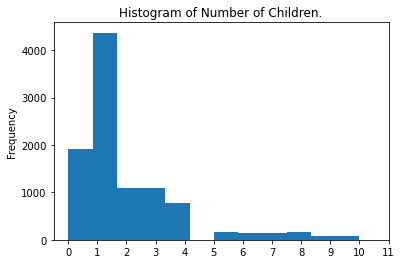

In [31]:
df['Children'].plot(kind='hist', bins=12, xticks=range(0,12), title='Histogram of Number of Children.')

<AxesSubplot:title={'center':'Histogram of Age.'}, ylabel='Frequency'>

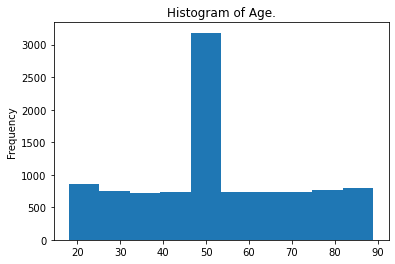

In [32]:
df.Age.plot(kind='hist', bins=10, title='Histogram of Age.')

## Re-expressing the values of columns as numeric that have only yes no responses or categorical responses that can be re-expressed

### Identifying outliers

In [33]:
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
# df[(np.abs(stats.zscore(df['Churn'])) > 3)]


# State                   

In [34]:
dict_state_categories_numeric = {'State':{
    'AK':0, 'MI':1, 'OR':2, 'CA':3, 'TX':4, 'GA':5, 'TN':6, 'OK':7, 'FL':8, 'OH':9, 'PA':10,
       'PR':11, 'IA':12, 'ME':13, 'IL':14, 'WI':15, 'NC':16, 'AL':17, 'NM':18, 'VT':19, 'MD':20, 'NY':21,
       'WA':22, 'CT':23, 'NJ':24, 'DC':25, 'ND':26, 'LA':27, 'NE':28, 'WV':29, 'AZ':30, 'MO':31, 'WY':32,
       'MT':33, 'VA':34, 'KY':35, 'MN':36, 'KS':37, 'MA':38, 'IN':39, 'SC':40, 'NH':41, 'DE':42, 'MS':43,
       'ID':44, 'AR':45, 'SD':46, 'CO':47, 'HI':48, 'UT':49, 'RI':50, 'NV':51
       }}

In [35]:
df.replace(dict_state_categories_numeric, inplace=True)

In [36]:
df.State.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

### Outliers

In [37]:
len(df[(np.abs(stats.zscore(df['State'])) > 3)])


0

In [38]:
df[(np.abs(stats.zscore(df['State'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# County                 

In [39]:
len(df.County.unique())

1620

# Zip                     

In [40]:
len(df[(np.abs(stats.zscore(df['Zip'])) > 3)])


0

In [41]:
df[(np.abs(stats.zscore(df['State'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# Lat                     

In [42]:
len(df.Lat.unique())

8563

### Outliers

In [43]:
len(df[(np.abs(stats.zscore(df['Lat'])) > 3)])


151

In [44]:
df[(np.abs(stats.zscore(df['Lat'])) > 3)]


CaseOrder Customer_id                           Interaction  \
1             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
12           12     E243720  c32b8522-d62a-49b1-a77a-e0534cb1378b   
287         287     K905632  9e7b66b1-95b1-46ba-a7d6-8bdb3f1f8427   
299         299     O825386  ff4e5d18-ba80-4be8-a5c3-4f8b5d5dee66   
360         360     K473134  b3b09fa7-cdde-44d0-9695-e70f6ce4201b   
...         ...         ...                                   ...   
9828       9828     H794689  cedb1fa5-7c78-4ff5-b8be-23b91b4cf524   
9874       9874     J547555  0b892c49-09c3-4da5-b3a6-40f9c5844ba4   
9902       9902     O774002  569131f4-71f4-4e59-9176-e4f8f7b7bbe1   
9939       9939     T295047  55a8bb6b-7bcf-441d-82be-3bb75042f2ed   
9985       9985     W838935  723e3f1a-0ceb-44c9-b4be-ce53b4c72564   

             City  State                 County    Zip       Lat        Lng  \
1     Point Baker      0  Prince of Wales-Hyder  99927  56.25100 -133.37571   
12        Corozal     11                Corozal    783  18.30410  -66.32847   
287        Hauula     48               Honolulu  96717  21.55604 -157.89624   
299    Ocean View     48                 Hawaii  96737  19.07026 -155.77587   
360         Kapaa     48                  Kauai  96746  22.09268 -159.38128   
...           ...    ...                    ...    ...       ...        ...   
9828    Anchorage      0            North Slope  99519  68.93806 -146.32360   
9874       Circle      0          Yukon-Koyukuk  99733  65.79284 -144.18280   
9902       Kaaawa     48               Honolulu  96730  21.54614 -157.85110   
9939       Togiak      0             Dillingham  99678  59.33282 -160.10850   
9985       Willow      0      Matanuska-Susitna  99688  61.90932 -150.03680   

      Population      Area             Timezone  \
1             38     Urban        America/Sitka   
12         33372     Rural  America/Puerto_Rico   
287         5148  Suburban     Pacific/Honolulu   
299         4926     Rural     Pacific/Honolulu   
360        19324  Suburban     Pacific/Honolulu   
...          ...       ...                  ...   
9828         469     Urban    America/Anchorage   
9874          74  Suburban    America/Anchorage   
9902        1359  Suburban     Pacific/Honolulu   
9939         768     Urban    America/Anchorage   
9985        2624     Rural    America/Anchorage   

                                    Job  Children   Age  \
1     Environmental health practitioner       1.0  68.0   
12                 Maintenance engineer       2.0  56.0   
287                 Scientist, forensic       2.0  60.0   
299                        Estate agent       4.0  82.0   
360       Clothing/textile technologist       1.0  53.0   
...                                 ...       ...   ...   
9828                            Dentist       0.0  33.0   
9874                          Archivist       2.0  63.0   
9902        Lecturer, further education       9.0  72.0   
9939              Adult guidance worker       1.0  19.0   
9985                    Games developer       0.0  50.0   

                           Education  Employment     Income        Marital  \
1                    Master's Degree   Part Time  28561.990        Widowed   
12                 Bachelor's Degree   Full Time  18342.120        Married   
287   Some College, Less than 1 Year   Full Time  11250.710      Separated   
299               Associate's Degree   Full Time  76066.770      Separated   
360                  Master's Degree  Unemployed   4180.220        Widowed   
...                              ...         ...        ...            ...   
9828      Professional School Degree   Full Time  33186.785        Widowed   
9874     Nursery School to 8th Grade     Retired  33186.785       Divorced   
9902               Bachelor's Degree   Full Time  77625.490        Married   
9939     Regular High School Diploma   Part Time  42381.630  Never Married   
9985     Regular High School Diploma     Retired

# Lng                     

In [45]:
len(df.Lng.unique())

8655

### Outliers

In [46]:
len(df[(np.abs(stats.zscore(df['Lng'])) > 3)])


102

In [47]:
df[(np.abs(stats.zscore(df['Lng'])) > 3)]
# outliers seem to be in Alaska and Hawaii

CaseOrder Customer_id                           Interaction        City  \
287         287     K905632  9e7b66b1-95b1-46ba-a7d6-8bdb3f1f8427      Hauula   
299         299     O825386  ff4e5d18-ba80-4be8-a5c3-4f8b5d5dee66  Ocean View   
360         360     K473134  b3b09fa7-cdde-44d0-9695-e70f6ce4201b       Kapaa   
407         407      Z42949  75892f69-e4f5-45c3-b47b-7134f021a6bc       Jbphh   
422         422     P365450  61e00139-606f-4149-a380-b12ea67adeda    Honolulu   
...         ...         ...                                   ...         ...   
9828       9828     H794689  cedb1fa5-7c78-4ff5-b8be-23b91b4cf524   Anchorage   
9874       9874     J547555  0b892c49-09c3-4da5-b3a6-40f9c5844ba4      Circle   
9902       9902     O774002  569131f4-71f4-4e59-9176-e4f8f7b7bbe1      Kaaawa   
9939       9939     T295047  55a8bb6b-7bcf-441d-82be-3bb75042f2ed      Togiak   
9985       9985     W838935  723e3f1a-0ceb-44c9-b4be-ce53b4c72564      Willow   

      State             County    Zip       Lat        Lng  Population  \
287      48           Honolulu  96717  21.55604 -157.89624        5148   
299      48             Hawaii  96737  19.07026 -155.77587        4926   
360      48              Kauai  96746  22.09268 -159.38128       19324   
407      48           Honolulu  96853  21.33475 -157.93464         599   
422      48           Honolulu  96814  21.29398 -157.84692       19527   
...     ...                ...    ...       ...        ...         ...   
9828      0        North Slope  99519  68.93806 -146.32360         469   
9874      0      Yukon-Koyukuk  99733  65.79284 -144.18280          74   
9902     48           Honolulu  96730  21.54614 -157.85110        1359   
9939      0         Dillingham  99678  59.33282 -160.10850         768   
9985      0  Matanuska-Susitna  99688  61.90932 -150.03680        2624   

          Area           Timezone  \
287   Suburban   Pacific/Honolulu   
299      Rural   Pacific/Honolulu   
360   Suburban   Pacific/Honolulu   
407      Urban   Pacific/Honolulu   
422      Urban   Pacific/Honolulu   
...        ...                ...   
9828     Urban  America/Anchorage   
9874  Suburban  America/Anchorage   
9902  Suburban   Pacific/Honolulu   
9939     Urban  America/Anchorage   
9985     Rural  America/Anchorage   

                                               Job  Children   Age  \
287                            Scientist, forensic       2.0  60.0   
299                                   Estate agent       4.0  82.0   
360                  Clothing/textile technologist       1.0  53.0   
407   Lighting technician, broadcasting/film/video       2.0  53.0   
422                   Trade union research officer       2.0  29.0   
...                                            ...       ...   ...   
9828                                       Dentist       0.0  33.0   
9874                                     Archivist       2.0  63.0   
9902                   Lecturer, further education       9.0  72.0   
9939                         Adult guidance worker       1.0  19.0   
9985                               Games developer       0.0  50.0   

                                Education  Employment     Income  \
287        Some College, Less than 1 Year   Full Time  11250.710   
299                    Associate's Degree   Full Time  76066.770   
360                       Master's Degree  Unemployed   4180.220   
407                    Associate's Degree     Retired  37631.400   
422   9th Grade to 12th Grade, No Diploma   Full Time  24447.030   
...                                   ...         ...        ...   
9828           Professional School Degree   Full Time  33186.785   
9874          Nursery School to 8th Grade     Retired  33186.785   
9902                    Bachelor's Degree   Full Time  77625.490   
9939          Regular High School Diploma   Part Time  42381.630   
9985          Regular High School Diploma     Retired  40935.120   

            Marital  Gender Churn  Outage

# Population              

In [48]:
len(df.Population.unique())

5933

### Outliers

In [49]:
len(df[(np.abs(stats.zscore(df['Population'])) > 3)])


219

In [50]:
df[(np.abs(stats.zscore(df['Population'])) > 3)]


CaseOrder Customer_id                           Interaction  \
58           58     C101444  5ed9b266-29a0-489e-88e0-59f9a0b39e49   
91           91     G491883  0319a159-cefc-4d57-804b-c5a16de84ca6   
101         101     O967373  57582d0e-06d5-453f-934f-cd35554c860c   
158         158     K265986  9f0486c9-e0fc-4762-8f35-e676fbefb689   
204         204      K33780  10a165f2-6ce5-47ff-bec5-925b3d5eebf0   
...         ...         ...                                   ...   
9648       9648     W662241  64d7344d-cec1-4558-83f3-aaad018c8433   
9729       9729     C304454  658084be-e583-42dd-b71b-df74dbb7d685   
9906       9906     T636629  bbe2f044-f023-4826-b154-797569131618   
9988       9988     C454652  c4cb88a8-dd44-46a4-84e7-891edf25cbaf   
9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   

              City  State         County    Zip       Lat        Lng  \
58          Goleta      3  Santa Barbara  93117  34.49127 -120.08222   
91      Greensboro     16       Guilford  27410  36.11785  -79.89432   
101     Birmingham     17         Shelby  35242  33.42521  -86.67144   
158    League City      4      Galveston  77573  29.50205  -95.08652   
204        Chicago     14           Cook  60639  41.92056  -87.75603   
...            ...    ...            ...    ...       ...        ...   
9648      Brooklyn     21          Kings  11238  40.67913  -73.96384   
9729         Mason      9         Warren  45040  39.35199  -84.31256   
9906  Kernersville     16        Forsyth  27284  36.11845  -80.07738   
9988       Chicago     14           Cook  60647  41.92068  -87.70167   
9997   Clarksville      6     Montgomery  37042  36.56907  -87.41694   

      Population      Area             Timezone                        Job  \
58         58431     Rural  America/Los_Angeles         Professor Emeritus   
91         55519     Rural     America/New_York                Chiropodist   
101        55122     Urban      America/Chicago             Pharmacologist   
158        86926     Rural      America/Chicago        Visual merchandiser   
204        90517  Suburban      America/Chicago      Merchant navy officer   
...          ...       ...                  ...                        ...   
9648       54540     Urban     America/New_York             Engineer, site   
9729       54507     Urban     America/New_York          Minerals surveyor   
9906       54413  Suburban     America/New_York          Scientist, marine   
9988       87509     Urban      America/Chicago  Editor, magazine features   
9997       77168     Rural      America/Chicago  Consulting civil engineer   

      Children   Age                            Education  Employment  \
58         1.0  33.0                    Bachelor's Degree   Full Time   
91         0.0  75.0       Some College, Less than 1 Year  Unemployed   
101        1.0  69.0          Nursery School to 8th Grade   Full Time   
158        1.0  39.0  9th Grade to 12th Grade, No Diploma   Full Time   
204        3.0  83.0          Regular High School Diploma   Full Time   
...        ...   ...                                  ...         ...   
9648       0.0  39.0                      Master's Degree   Full Time   
9729       1.0  61.0  9th Grade to 12th Grade, No Diploma   Full Time   
9906       1.0  30.0                    Bachelor's Degree   Full Time   
9988       1.0  53.0  9th Grade to 12th Grade, No Diploma   Full Time   
9997       4.0  48.0          Regular High School Diploma   Part Time   

          Income    Marital  Gender Churn  Outage_sec_perweek  Email  \
58     15690.250    Widowed  Female    No           11.310199     11   
91     58482.900  Separated  Female   Yes            7.832112     13   
101    58077.380  Separated    Male   Yes           10.822104     12   
158    33186.785   Divorced    Male    No            7.519193      9   
204    44223.580    Widowed  Female    No            8.339727     15   
...          ...        ...     ...   ...                 ...    .

# Timezone               

In [51]:
dict_timezone_categories_numeric = {'Timezone':{
    'America/Sitka':1,
    'America/Detroit':2,
    'America/Los_Angeles':3,
    'America/Chicago':4,
    'America/New_York':5,
    'America/Puerto_Rico':6,
    'America/Denver':7,
    'America/Menominee':8,
    'America/Phoenix':9,
    'America/Indiana/Indianapolis':10,
    'America/Boise':11,
    'America/Kentucky/Louisville':12,
    'Pacific/Honolulu':13,
    'America/Indiana/Petersburg':14,
    'America/Nome':15,
    'America/Anchorage':16,
    'America/Indiana/Knox':17,
    'America/Juneau':18,
    'America/Toronto':19,
    'America/Indiana/Winamac':20,
    'America/Indiana/Vincennes':21,
    'America/North_Dakota/New_Salem':22,
    'America/Indiana/Tell_City':23,
    'America/Indiana/Marengo':24,
    'America/Ojinaga':25}}

In [52]:
df.replace(dict_timezone_categories_numeric, inplace = True)

In [53]:
df.Timezone.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

### Outliers

In [54]:
len(df[(np.abs(stats.zscore(df['Timezone'])) > 3)])


198

In [55]:
df[(np.abs(stats.zscore(df['Timezone'])) > 3)]


CaseOrder Customer_id                           Interaction  \
165         165     T278739  2f84e063-6918-485b-8341-4c5e27d63de5   
182         182     Q991854  39b31972-2401-47ff-bc48-bd85a90dc113   
287         287     K905632  9e7b66b1-95b1-46ba-a7d6-8bdb3f1f8427   
299         299     O825386  ff4e5d18-ba80-4be8-a5c3-4f8b5d5dee66   
335         335     O402306  c8ffb29f-7ee4-4883-8698-f6936607cd04   
...         ...         ...                                   ...   
9935       9935     T867814  3f5ccc97-8a12-4573-bf06-03a59e39eec0   
9939       9939     T295047  55a8bb6b-7bcf-441d-82be-3bb75042f2ed   
9940       9940     I543072  e13ae28c-5a57-4788-9c21-463aa375adb7   
9982       9982     T786944  51066832-3277-40c0-b08d-404050cc1409   
9985       9985     W838935  723e3f1a-0ceb-44c9-b4be-ce53b4c72564   

             City  State             County    Zip       Lat        Lng  \
165        Hailey     44             Blaine  83333  43.56677 -114.31550   
182   Clarksville     39              Clark  47129  38.31387  -85.76896   
287        Hauula     48           Honolulu  96717  21.55604 -157.89624   
299    Ocean View     48             Hawaii  96737  19.07026 -155.77587   
335        Salmon     44              Lemhi  83467  45.00975 -113.89910   
...           ...    ...                ...    ...       ...        ...   
9935    Cannelton     39              Perry  47520  37.98604  -86.59334   
9939       Togiak      0         Dillingham  99678  59.33282 -160.10850   
9940   Lewisville     44          Jefferson  83431  43.68884 -112.02970   
9982      Newdale     44            Fremont  83436  43.85686 -111.47660   
9985       Willow      0  Matanuska-Susitna  99688  61.90932 -150.03680   

      Population      Area  Timezone                        Job  Children  \
165        10398     Rural        11                     Dealer       3.0   
182        19669     Urban        12                       Land       4.0   
287         5148  Suburban        13        Scientist, forensic       2.0   
299         4926     Rural        13               Estate agent       4.0   
335         5978  Suburban        11           Therapist, music       9.0   
...          ...       ...       ...                        ...       ...   
9935        2854     Rural        23              Haematologist       1.0   
9939         768     Urban        16      Adult guidance worker       1.0   
9940         786     Rural        11  Psychologist, educational       2.0   
9982         488     Urban        11          Barrister's clerk       1.0   
9985        2624     Rural        16            Games developer       0.0   

       Age                                 Education  Employment     Income  \
165   34.0               Regular High School Diploma  Unemployed  96382.760   
182   59.0  Some College, 1 or More Years, No Degree   Full Time  25519.910   
287   60.0            Some College, Less than 1 Year   Full Time  11250.710   
299   82.0                        Associate's Degree   Full Time  76066.770   
335   53.0                           Master's Degree   Part Time  33186.785   
...    ...                                       ...         ...        ...   
9935  49.0  Some College, 1 or More Years, No Degree  Unemployed  57886.920   
9939  19.0               Regular High School Diploma   Part Time  42381.630   
9940  53.0  Some College, 1 or More Years, No Degree   Full Time  36876.810   
9982  53.0                           Master's Degree   Full Time  61722.440   
9985  50.0               Regular High School Diploma     Retired  40935.120   

            Marital                Gender Churn  Outage_sec_perweek  Email  \
165         Married                  Male   Yes            8.685939     14   
182   Never Married  Prefer not to answer   Yes           12.586976     12   
287       Separated                Female   Yes           11.147257     16   
299       Separated                  Male    No           15.290915     12   
335   Never 

# Job                     

In [56]:
df.Job.unique()

array(['Environmental health practitioner', 'Programmer, multimedia',
       'Chief Financial Officer', 'Solicitor', 'Medical illustrator',
       'Chief Technology Officer', 'Surveyor, hydrographic',
       'Sales promotion account executive',
       'Teaching laboratory technician', 'Museum education officer',
       'Teacher, special educational needs', 'Maintenance engineer',
       'Engineer, broadcasting (operations)', 'Learning disability nurse',
       'Automotive engineer', 'Amenity horticulturist',
       'Applications developer', 'Immunologist', 'Engineer, electrical',
       'Broadcast presenter', 'Counsellor', 'Geophysical data processor',
       'Designer, multimedia', 'Event organiser',
       'Equality and diversity officer', 'Psychiatrist',
       'Surveyor, commercial/residential', 'Civil Service administrator',
       'Radiographer, diagnostic', 'Air traffic controller', 'Dietitian',
       'Therapist, occupational', 'Building services engineer',
       'Information 

# Employment              

In [57]:
dict_employment_categories_numeric = {'Employment':{
    'Part Time':0,
    'Retired':1,
    'Student':2,
    'Full Time':3,
    'Unemployed':4
}}

In [58]:
df.replace(dict_employment_categories_numeric, inplace = True)

### Outliers

In [59]:
len(df[(np.abs(stats.zscore(df['Employment'])) > 3)])


0

In [60]:
df[(np.abs(stats.zscore(df['Employment'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

In [61]:
df.Employment.unique()

array([0, 1, 2, 3, 4])

# Income                  

In [62]:
len(df.Income.unique())

7507

### Outliers

In [63]:
len(df[(np.abs(stats.zscore(df['Income'])) > 3)])


193

In [64]:
df[(np.abs(stats.zscore(df['Income'])) > 3)]


CaseOrder Customer_id                           Interaction  \
14           14      X44200  780992d3-d758-4152-aceb-5d59edda3d15   
47           47     B609739  bb4a7c2d-6524-41d6-b2ed-f7511509ff5b   
93           93     K581313  87ec7c0f-2780-4909-9bf3-5369082eab90   
131         131     X645702  cfc79a87-f608-485d-86c9-cfce7db37a29   
187         187     F501848  b47490b5-a967-4f46-a76a-600552c4d141   
...         ...         ...                                   ...   
9727       9727     B689525  be842d38-7058-4eb1-bddc-2bf1c73ffbb0   
9759       9759     L933769  02d26ed1-c450-428f-8dd3-71403cd56cd7   
9850       9850     C406267  5fae818b-cdcb-452e-bb5a-c9dc04ed9383   
9877       9877     T156561  34f05b13-dc84-4732-a9ac-2e2c68a2d625   
9892       9892     J966666  203d77c6-4cb3-45ba-9ea9-c7c61f98e51f   

                City  State        County    Zip       Lat        Lng  \
14    East Livermore     13  Androscoggin   4228  44.43256  -70.11501   
47            Peoria     14        Peoria  61606  40.69980  -89.61143   
93           Reading      1     Hillsdale  49274  41.83849  -84.76277   
131         Dennison      9    Tuscarawas  44621  40.42752  -81.29587   
187        Beckville      4        Panola  75631  32.24926  -94.45456   
...              ...    ...           ...    ...       ...        ...   
9727         Oldhams     34  Westmoreland  22529  38.00965  -76.68586   
9759          Chunky     43        Newton  39323  32.35104  -88.92634   
9850         Laporte     47       Larimer  80535  40.73342 -105.18350   
9877      Manchester     41  Hillsborough   3104  43.00934  -71.44146   
9892           Etlan     34       Madison  22719  38.53063  -78.28568   

      Population      Area  Timezone                            Job  Children  \
14             0     Urban         5      Learning disability nurse       5.0   
47          7870  Suburban         4            Broadcast presenter       1.0   
93          3499  Suburban         2  Designer, television/film set       0.0   
131         4476     Rural         5    Corporate investment banker       0.0   
187         3151  Suburban         4       Journalist, broadcasting       8.0   
...          ...       ...       ...                            ...       ...   
9727         155  Suburban         5      Medical technical officer       0.0   
9759        1475  Suburban         4                   Nurse, adult       0.0   
9850        2613     Urban         7                         Dancer       1.0   
9877       32603  Suburban         5       Chief Technology Officer       1.0   
9892         271     Rural         5                 Science writer       1.0   

       Age                            Education  Employment     Income  \
14    53.0               No Schooling Completed           1  115114.57   
47    23.0                   Associate's Degree           1  132116.33   
93    68.0       Some College, Less than 1 Year           2  115510.46   
131   47.0          Regular High School Diploma           3  125814.88   
187   78.0          Regular High School Diploma           3  135727.71   
...    ...                                  ...         ...        ...   
9727  21.0          Regular High School Diploma           3  112773.20   
9759  87.0                    Bachelor's Degree           3  113392.50   
9850  53.0  9th Grade to 12th Grade, No Diploma           2  134443.30   
9877  85.0                      Master's Degree           3  128468.00   
9892  53.0          Regular High School Diploma           2  121219.60   

        Marital  Gender Churn  Outage_sec_perweek  Email  Contacts  \
14    Separated  Female    No            6.568344     14         1   
47     Divorced    Male   Yes           12.609107     11         1   
93    Separated  Female    No            5.655483      3         1   
131    Divorced  Female   Yes           39.696851     10         0   
187   Separated    Male    No           10.835332     14         0   
...         ...   

# Outage_sec_perweek      

In [65]:
len(df.Outage_sec_perweek.unique())

9993

### Outliers

In [66]:
len(df[(np.abs(stats.zscore(df['Outage_sec_perweek'])) > 3)])


491

In [67]:
df[(np.abs(stats.zscore(df['Outage_sec_perweek'])) > 3)]


CaseOrder Customer_id                           Interaction  \
29           29     J887250  a49a3cbf-182c-49f5-b15f-e124582d2c8f   
37           37     U790894  01fa4db5-6be5-47de-a3ac-53b95e5c44a8   
41           41     X711438  3c086e5c-e913-43b6-90d0-30b15b7cd37f   
62           62     O942919  176d7713-b919-41c3-badf-676dc1abbf07   
131         131     X645702  cfc79a87-f608-485d-86c9-cfce7db37a29   
...         ...         ...                                   ...   
9895       9895     M593222  8e17fc2f-b4b9-43ed-81fd-f76425fc3cce   
9896       9896     Y827249  683654d1-0905-4992-a131-d9510c87f882   
9908       9908     X106044  c504ace3-2fa9-4bf5-83cc-023d16e653cb   
9946       9946     T260778  e8f84606-857d-40c4-aac1-31a235948601   
9951       9951     C668339  fc2f692c-4ab4-48be-b2d1-cbc6a08d45f0   

             City  State      County    Zip       Lat       Lng  Population  \
29       Moretown     19  Washington   5660  44.24718 -72.74137        1716   
37    Marlborough     23    Hartford   6447  41.63306 -72.45472        6394   
41    Mantoloking     24       Ocean   8738  40.02145 -74.06183        1164   
62        Delavan     14    Tazewell  61734  40.37342 -89.52646        2765   
131      Dennison      9  Tuscarawas  44621  40.42752 -81.29587        4476   
...           ...    ...         ...    ...       ...       ...         ...   
9895  Valley View     10  Schuylkill  17983  40.64263 -76.54692        1482   
9896       Pinson     17   Jefferson  35126  33.73147 -86.65417       20825   
9908  Valley Bend     29    Randolph  26293  38.78246 -79.93577         550   
9946     Burchard     28      Pawnee  68323  40.14019 -96.38206         231   
9951     Columbus      9    Franklin  43217  39.81677 -82.93188        2440   

          Area  Timezone                          Job  Children   Age  \
29       Urban         5  Civil Service administrator       3.0  53.0   
37    Suburban         5            Market researcher       2.0  26.0   
41       Urban         5     Customer service manager       3.0  53.0   
62       Urban         4       Recruitment consultant       1.0  25.0   
131      Rural         5  Corporate investment banker       0.0  47.0   
...        ...       ...                          ...       ...   ...   
9895     Urban         5       Museum/gallery curator       1.0  83.0   
9896  Suburban         4        Accommodation manager       0.0  24.0   
9908     Urban         5           Professor Emeritus       1.0  26.0   
9946     Urban         4      Secretary/administrator       0.0  89.0   
9951  Suburban         5               Engineer, land       0.0  19.0   

                                     Education  Employment      Income  \
29                 Regular High School Diploma           3   33186.785   
37                 Regular High School Diploma           3   10114.810   
41                 Regular High School Diploma           3   38211.370   
62                           Bachelor's Degree           3   81831.490   
131                Regular High School Diploma           3  125814.880   
...                                        ...         ...         ...   
9895               Regular High School Diploma           3   48656.130   
9896             GED or Alternative Credential           2   33430.290   
9908               Regular High School Diploma           2   33186.785   
9946                         Bachelor's Degree           1   33186.785   
9951  Some College, 1 or More Years, No Degree           3   48311.820   

            Marital  Gender Churn  Outage_sec_perweek  Email  Contacts  \
29        Separated  Female   Yes           43.927052     13         2   
37    Never Married  Female   Yes           44.725202     16         1   
41         Divorced  Female    No           38.905335     12         1   
62          Widowed    Male    No           39.883903     10         3   
131        Divorced  Female   Yes           39.696851     10         0   
...             ..

# Email                   

In [68]:
len(df.Email.unique())

23

### Outliers

In [69]:
len(df[(np.abs(stats.zscore(df['Email'])) > 3)])


12

In [70]:
df[(np.abs(stats.zscore(df['Email'])) > 3)]


CaseOrder Customer_id                           Interaction  \
796         796     V397454  61317680-6fcb-46e3-a3ae-6dfb5d74652d   
1153       1153     B328912  0e6351f8-e91b-44c4-b4d1-1876ec047b91   
1382       1382     A626819  9f969c90-52dd-4575-8a73-b8f3a5d6baea   
1400       1400     P897691  97c7cf1b-1c78-4a7d-8c2c-cd528f65218d   
1474       1474      N49031  6d4104a2-bb45-4995-b0a5-680df77c70a8   
1747       1747     Z756585  3d6df3c6-daef-4920-90aa-50aa240d0125   
6321       6321     R392539  4a979f3a-2bcd-4d61-9eb7-d8730e06b03d   
7409       7409     X451865  ba32dc79-a135-4360-b13d-ecbd6d989181   
8366       8366     Q926339  f58d5572-c1f9-4092-b363-f07fbd2446c1   
8949       8949     I301776  ebafa68f-e3b4-4dfc-96e8-46630f8ec00d   
9249       9249     N508508  afe055dd-0435-4554-be03-45d6fbc5c914   
9476       9476     U102287  b454d911-062c-483f-a4ea-35e84fd6c45e   

             City  State       County    Zip       Lat        Lng  Population  \
796       Readlyn     12       Bremer  50668  42.69069  -92.22652        1174   
1153       Galena     31        Stone  65656  36.79505  -93.46672        4477   
1382         Anna      4       Collin  75409  33.35197  -96.52735       15379   
1400    Arlington     14       Bureau  61312  41.43573  -89.23293         511   
1474      Houston      4       Harris  77098  29.73487  -95.41529       13549   
1747     Carthage      4       Panola  75633  32.12895  -94.27705       13553   
6321  Noblesville     39     Hamilton  46062  40.06175  -86.05543       35151   
7409      Trinway      9    Muskingum  43842  40.13683  -82.01275         330   
8366       Powell      4      Navarro  75153  32.15027  -96.32857         397   
8949     Glendale      3  Los Angeles  91204  34.13636 -118.26100       18720   
9249   Estherwood     27       Acadia  70534  30.19491  -92.44206         945   
9476        Belva     29     Nicholas  26656  38.26455  -81.16352         323   

          Area  Timezone                                     Job  Children  \
796      Urban         4                     Hospital pharmacist       1.0   
1153  Suburban         4                               Herbalist       1.0   
1382  Suburban         4                   Theatre stage manager       3.0   
1400  Suburban         4   English as a foreign language teacher       0.0   
1474     Rural         4                           Lexicographer       1.0   
1747     Urban         4                   Multimedia programmer       1.0   
6321  Suburban        10                              IT trainer       0.0   
7409  Suburban         5                  Programmer, multimedia       1.0   
8366  Suburban         4                   Journalist, newspaper       1.0   
8949     Urban         3         Producer, television/film/video       1.0   
9249     Rural         4  Teacher, English as a foreign language       5.0   
9476     Urban         5                       Freight forwarder       2.0   

       Age                                 Education  Employment     Income  \
796   85.0  Some College, 1 or More Years, No Degree           3  14824.710   
1153  53.0            Some College, Less than 1 Year           3  33186.785   
1382  82.0                           Master's Degree           3  33168.880   
1400  84.0                         Bachelor's Degree           2  43525.940   
1474  32.0               Nursery School to 8th Grade           0  33186.785   
1747  53.0                           Master's Degree           0  56096.930   
6321  57.0               Regular High School Diploma           1  31647.650   
7409  49.0       9th Grade to 12th Grade, No Diploma           0  33186.785   
8366  47.0                    No Schooling Completed           0  33186.785   
8949  53.0                           Master's Degree           3  28877.800   
9249  53.0               Regular High School Diploma           4  80593.060   
9476  55.0                           Master's Degree           3  33186.785   

           

# Contacts                

In [71]:
len(df.Contacts.unique())

8

### Outliers

In [72]:
len(df[(np.abs(stats.zscore(df['Contacts'])) > 3)])


165

In [73]:
df[(np.abs(stats.zscore(df['Contacts'])) > 3)]


CaseOrder Customer_id                           Interaction  \
89           89      C73741  1ca2e70f-6207-4514-a8ce-e97244a56251   
130         130     S985225  f3878f9d-fe73-4db7-9d66-de25fab169c1   
188         188     Q971369  6ec3ca40-a3db-4a9d-b0c8-012950c949bd   
206         206     Q279060  33a0892c-cd0b-4177-865c-b836af7a9a1c   
346         346     O511762  3a0cf6f8-3aa9-4262-b5a0-e9c7788cbac5   
...         ...         ...                                   ...   
9800       9800      D32957  774a53fc-547a-4402-ad49-72abe33914b1   
9806       9806     G824974  a0de52e5-421f-4cd1-b98e-9d1e39945f06   
9829       9829     W814496  e576dc49-9d95-4f8e-9d77-734e901e7424   
9924       9924     I173343  0deb3f09-647c-467b-94c0-a621350323c8   
9973       9973     F952565  559568ad-0d48-4ebb-9bc8-f1a50230a1c2   

              City  State        County    Zip       Lat        Lng  \
89       Waterbury     23     New Haven   6704  41.58650  -73.03305   
130        Momence     14      Kankakee  60954  41.15338  -87.62902   
188    Barnesville     10    Schuylkill  18214  40.79879  -76.08148   
206         Cosmos     36        Meeker  56228  44.93688  -94.67707   
346   Arnoldsville      5    Oglethorpe  30619  33.85751  -83.24105   
...            ...    ...           ...    ...       ...        ...   
9800        Athens     17     Limestone  35614  34.86542  -87.08385   
9806       Hyampom      3       Trinity  96046  40.59969 -123.42900   
9829       Donegal     10  Westmoreland  15628  40.10054  -79.37343   
9924      Caliente     51       Lincoln  89008  37.27637 -114.54630   
9973      Danville      3  Contra Costa  94506  37.80812 -121.90630   

      Population      Area  Timezone                              Job  \
89         25576     Rural         5                     Nurse, adult   
130         5846     Urban         4                        Osteopath   
188         1919     Rural         5          Engineer, manufacturing   
206         1003  Suburban         4        Occupational psychologist   
346         1277     Rural         5  Producer, television/film/video   
...          ...       ...       ...                              ...   
9800        7638     Rural         4          Chartered loss adjuster   
9806         165  Suburban         3                     Bonds trader   
9829         728     Rural         5             Community pharmacist   
9924        1324     Urban         3               Jewellery designer   
9973       25258  Suburban         3        Health and safety adviser   

      Children   Age                            Education  Employment  \
89         1.0  53.0          Regular High School Diploma           3   
130        5.0  32.0          Regular High School Diploma           3   
188        1.0  53.0          Nursery School to 8th Grade           4   
206        0.0  25.0  9th Grade to 12th Grade, No Diploma           1   
346        4.0  85.0  9th Grade to 12th Grade, No Diploma           2   
...        ...   ...                                  ...         ...   
9800       4.0  71.0          Regular High School Diploma           2   
9806       0.0  45.0          Nursery School to 8th Grade           3   
9829       1.0  77.0          Regular High School Diploma           3   
9924       4.0  38.0                   Associate's Degree           3   
9973       1.0  53.0                    Bachelor's Degree           1   

         Income        Marital                Gender Churn  \
89    33186.785      Separated                Female   Yes   
130    9515.640       Divorced                  Male   Yes   
188   47726.250      Separated                Female   Yes   
206   30664.560      Separated                Female   Yes   
346   14980.500       Divorced                Female   Yes   
...         ...            ...                   ...   ...   
9800  33186.785      Separated                  Male    No   
9806  13219.000      Separated                  Male    No   
9829  65565.

# Yearly_equip_failure    

In [74]:
len(df.Yearly_equip_failure.unique())

6

### Outliers

In [75]:
len(df[(np.abs(stats.zscore(df['Yearly_equip_failure'])) > 3)])


94

In [76]:
df[(np.abs(stats.zscore(df['Yearly_equip_failure'])) > 3)]


CaseOrder Customer_id                           Interaction  \
9             9     M716771  05a49ee3-8fd5-453a-a5f3-82b6cd986856   
21           21     X325271  ebf7fbd7-9f65-48d8-8f82-b7b7fd4f3412   
172         172     P954849  7ec593ca-82bd-4a03-8359-ab20212e3ce7   
593         593     X987521  c09f56b6-1b05-46ea-b33c-8d9fed4dea5c   
622         622     S636055  bba47549-f3bb-46d7-b4f3-1c4effa75b3b   
...         ...         ...                                   ...   
9624       9624     Q831134  5b4ad141-b338-4638-9b10-1d0e2ce826b5   
9675       9675     H712105  0a489672-b274-4fb8-9e82-9705e4bd9933   
9764       9764     A472924  68f06d83-dca3-473e-9543-3246da5c941d   
9770       9770     W133136  24a71b97-d47a-4ab6-b0a0-3c3cf30257dd   
9968       9968     Q597995  17ead91e-fee8-4b36-bec3-60610ced2732   

               City  State       County    Zip       Lat        Lng  \
9       Saint Cloud      8      Osceola  34771  28.27646  -81.16273   
21        Kaneville     14         Kane  60144  41.83594  -88.52060   
172   Valley Stream     21       Nassau  11580  40.67495  -73.70356   
593     Westerville      9     Franklin  43081  40.11064  -82.89134   
622         Marlton     24   Burlington   8053  39.86049  -74.89466   
...             ...    ...          ...    ...       ...        ...   
9624  Granada Hills      3  Los Angeles  91344  34.29392 -118.50750   
9675        Jackson      1      Jackson  49203  42.22151  -84.40110   
9764       Snelling      3       Merced  95369  37.53346 -120.43170   
9770        Buffalo     21         Erie  14207  42.95167  -78.89778   
9968      Lynnfield     38        Essex   1940  42.53456  -71.03757   

      Population      Area  Timezone                             Job  \
9          17351  Suburban         5  Teaching laboratory technician   
21            69     Rural         4                      Counsellor   
172        43714  Suburban         5             Geologist, wellsite   
593        61572  Suburban         5              Surveyor, building   
622        45193     Rural         5                  Energy manager   
...          ...       ...       ...                             ...   
9624       53266     Urban         3        Engineer, communications   
9675       38659  Suburban         2            Journalist, magazine   
9764         990     Urban         3               Financial manager   
9770       23808  Suburban         5          Manufacturing engineer   
9968       13484     Rural         5                 Legal secretary   

      Children   Age                                 Education  Employment  \
9          2.0  49.0            Some College, Less than 1 Year           3   
21         4.0  53.0               Nursery School to 8th Grade           1   
172        1.0  31.0  Some College, 1 or More Years, No Degree           3   
593        2.0  80.0       9th Grade to 12th Grade, No Diploma           3   
622        1.0  43.0       9th Grade to 12th Grade, No Diploma           3   
...        ...   ...                                       ...         ...   
9624      10.0  79.0                          Doctorate Degree           3   
9675       1.0  53.0                         Bachelor's Degree           1   
9764       1.0  53.0       9th Grade to 12th Grade, No Diploma           4   
9770       0.0  83.0               Regular High School Diploma           1   
9968       0.0  87.0            Some College, Less than 1 Year           0   

         Income        Marital                Gender Churn  \
9     58634.510      Separated  Prefer not to answer    No   
21    39624.210  Never Married                  Male    No   
172   35321.460        Married                  Male   Yes   
593   33186.785        Married                  Male   Yes   
622   14900.460       Divorced                Female   Yes   
...         ...            ...                   ...   ...   
9624  42222.250        Married                Female    No   
9675  33186.785  Never Mar

# Tenure                  

In [77]:
len(df.Tenure.unique())

9065

### Outliers

In [78]:
len(df[(np.abs(stats.zscore(df['Tenure'])) > 3)])


0

In [79]:
df[(np.abs(stats.zscore(df['Tenure'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# MonthlyCharge           

In [80]:
len(df.MonthlyCharge.unique())

9984

### Outliers

In [81]:
len(df[(np.abs(stats.zscore(df['MonthlyCharge'])) > 3)])


3

In [82]:
df[(np.abs(stats.zscore(df['MonthlyCharge'])) > 3)]


CaseOrder Customer_id                           Interaction  \
928         928     O479736  fa6578cd-243a-498d-9a20-8fd5a133c982   
3747       3747     Q642279  869dcfbe-d65e-45f7-844c-736ae3426677   
4701       4701     I250439  c9a55402-8498-4b7f-97ad-7f2bee5eece3   

             City  State                 County    Zip       Lat        Lng  \
928        Mendon     49                  Cache  84325  41.72579 -111.99279   
3747  Point Baker      0  Prince of Wales-Hyder  99927  56.25100 -133.37570   
4701        Inkom     44                Bannock  83245  42.81817 -112.22040   

      Population   Area  Timezone                  Job  Children   Age  \
928         2358  Rural         7  Visual merchandiser       1.0  53.0   
3747          38  Rural         1        Herpetologist       0.0  53.0   
4701        2144  Urban        11       Dramatherapist       4.0  32.0   

                                Education  Employment     Income  \
928           Nursery School to 8th Grade           3   7598.570   
3747  9th Grade to 12th Grade, No Diploma           3  33186.785   
4701                    Bachelor's Degree           3  52866.310   

            Marital  Gender Churn  Outage_sec_perweek  Email  Contacts  \
928        Divorced    Male   Yes           37.018121     17         0   
3747  Never Married  Female   Yes           40.421970     18         1   
4701      Separated    Male   Yes           38.814030     12         0   

      Yearly_equip_failure Techie        Contract Port_modem Tablet  \
928                      0     No  Month-to-month         No    Yes   
3747                     0     No  Month-to-month         No     No   
4701                     0    Yes  Month-to-month        Yes    Yes   

     InternetService    Phone Multiple OnlineSecurity OnlineBackup  \
928      Fiber Optic      Yes      Yes            Yes          Yes   
3747     Fiber Optic  unknown      Yes             No          Yes   
4701     Fiber Optic      Yes      Yes            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies  \
928               Yes          No         Yes             Yes   
3747              Yes         Yes         Yes             Yes   
4701              Yes     unknown         Yes             Yes   

     PaperlessBilling             PaymentMethod    Tenure  MonthlyCharge  \
928               Yes  Bank Transfer(automatic)  6.434281     307.528124   
3747               No   Credit Card (automatic)  5.962119     315.878600   
4701              Yes              Mailed Check  4.581601     306.268000   

      Bandwidth_GB_Year  item1  item2  item3  item4  item5  item6  item7  \
928         1482.558282      4      4      4      5      2      4      2   
3747        1288.595000      4      3      5      3      4      4      4   
4701        1383.764000      2      3      3      3      4      1      2   

      item8  
928       2  
3747      4  
4701      3

# Bandwidth_GB_Year       

In [83]:
len(df.Bandwidth_GB_Year.unique())

8972

### Outliers

In [84]:
len(df[(np.abs(stats.zscore(df['Bandwidth_GB_Year'])) > 3)])


0

In [85]:
df[(np.abs(stats.zscore(df['Bandwidth_GB_Year'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# item1                   

In [86]:
len(df.item1.unique())

7

### Outliers

In [87]:
len(df[(np.abs(stats.zscore(df['item1'])) > 3)])


19

In [88]:
df[(np.abs(stats.zscore(df['item1'])) > 3)]


CaseOrder Customer_id                           Interaction  \
398         398     F902621  5d12a098-4b9f-41e0-8f0e-6e06c9bfcf0c   
1511       1511     J673680  d73d58f4-49fc-47d7-a056-24b252e85406   
2135       2135     V812066  2f7ce16a-d6b7-4a8c-890a-ccd72cd08594   
2265       2265     D538894  cbd35843-fae7-4eb9-814b-9b4b6480b774   
2559       2559     J512358  7cf4b073-c332-4398-8ad8-9631e877ff57   
2741       2741     A784083  058af548-e940-49bf-b14e-51311125852d   
4484       4484     E631245  a297b5c2-671a-46e3-98c8-279002c85376   
4752       4752     E446263  5efc490e-942c-4d1e-b061-cd7a3a896272   
5129       5129     F251167  829a18b3-2649-4324-aecb-85f777148eec   
5448       5448     X603267  0a2c603f-271e-4b35-a81f-ea9d29a353d1   
5982       5982     I768093  c6d69286-6a26-4610-a509-d8cabfb35d6d   
7297       7297     E927955  475cdf7c-a63c-4c0b-9ffa-daab351817b0   
7302       7302     J692528  0b5df1f6-9395-4b3a-9ad0-bc122987ce0c   
7488       7488     U229229  e790fbb9-2588-4b40-b5d6-31a4bc02b80d   
8206       8206     W520409  b97bced5-5692-4471-a6f4-e436c02a1726   
8906       8906     J622447  6cda2cb0-44bb-493d-9dc6-6e0282063810   
9071       9071     I137232  9a9179c9-401e-49de-8753-b2621cc89bc7   
9323       9323     T191927  359b9907-46db-4a7f-9cc8-767b5347b380   
9731       9731     Z874007  7a636c15-ca5b-4c7f-b2dd-d6b7df7a157a   

                 City  State          County    Zip       Lat        Lng  \
398       Center Line      1          Macomb  48015  42.48045  -83.02719   
1511          Freedom     41         Carroll   3836  43.82621  -71.07147   
2135           Biloxi     43        Harrison  39532  30.49403  -88.96513   
2265      South Haven     36          Meeker  55382  45.30638  -94.20457   
2559      Charlestown     20           Cecil  21914  39.57307  -75.98179   
2741           Dewart     10  Northumberland  17730  41.11040  -76.87848   
4484      Big Springs     28           Deuel  69122  41.13007 -102.10260   
4752          Moclips     22    Grays Harbor  98562  47.23854 -124.20360   
5129          Wheaton     36        Traverse  56296  45.82867  -96.46747   
5448     Harwich Port     38      Barnstable   2646  41.67079  -70.07194   
5982           Biscoe     45         Prairie  72017  34.89726  -91.41028   
7297  Center Sandwich     41         Carroll   3227  43.82773  -71.46772   
7302        Rochester     41       Strafford   3867  43.30327  -70.98691   
7488       Bear Creek     17          Marion  35543  34.22419  -87.75005   
8206            Bronx     21           Bronx  10475  40.86953  -73.82532   
8906           Turkey      4            Hall  79261  34.45015 -100.81110   
9071      Rocky River      9        Cuyahoga  44116  41.47017  -81.85251   
9323           Orient     21         Suffolk  11957  41.14927  -72.26173   
9731         Westdale     21          Oneida  13483  43.39757  -75.82556   

      Population      Area  Timezone                                    Job  \
398         8303     Urban         2                                 Lawyer   
1511        1353     Urban         5                 Embryologist, clinical   
2135       37122     Rural         4                  Private music teacher   
2265        3649     Urban         4                                 Artist   
2559         771     Urban         5                  Theatre stage manager   
2741         200  Suburban         5                Chief Marketing Officer   
4484         729  Suburban         7                       Heritage manager   
4752           0     Rural         3                 Chief Strategy Officer   
5129        1948  Suburban         4              Publishing rights manager   
5448        1868  Suburban         5                     Facilities manager   
5982         540     Rural         4       Training and development officer   
7297         979     Urban         5                      Designer, graphic   
7302       21519  Suburban         5           Engineer, civil (consulting)  

# item2                   

In [89]:
len(df.item2.unique())

7

### Outliers

In [90]:
len(df[(np.abs(stats.zscore(df['item2'])) > 3)])


13

In [91]:
df[(np.abs(stats.zscore(df['item2'])) > 3)]


CaseOrder Customer_id                           Interaction  \
2357       2357     E856185  d3d47cd5-be0f-4e12-9a43-a1f3e70ab0cb   
2559       2559     J512358  7cf4b073-c332-4398-8ad8-9631e877ff57   
2744       2744     C707263  4a130e38-a425-47e2-ba31-5f32dbbabdcf   
5966       5966     L850408  75632b89-0f58-4cfc-ae31-0254b37e9fe3   
6616       6616     S388590  c7105a1f-84a3-44b9-8519-db8618311cc6   
7056       7056     R501652  9a7393fc-f17e-4c92-b478-2a21a071ec45   
7168       7168     Z600850  3e023ed4-b555-4fe8-a9d7-fb524df1f16c   
7297       7297     E927955  475cdf7c-a63c-4c0b-9ffa-daab351817b0   
7565       7565     X863186  eb952845-ffa2-48ea-a3d1-236e6d6e95fe   
8012       8012     R457980  64f3841f-90e3-435d-a8c7-49f201018077   
8118       8118     K952325  4b7ba9b0-c640-4093-86f2-367580c93456   
8245       8245     M494039  f26fa725-fc5b-4677-9603-e7cb469abb51   
8830       8830     E559589  44108b53-db7d-4d10-842b-843293b78e3c   

                   City  State      County    Zip       Lat       Lng  \
2357            Denmark      6     Madison  38391  35.55104 -88.99404   
2559        Charlestown     20       Cecil  21914  39.57307 -75.98179   
2744            Horsham     10  Montgomery  19044  40.18607 -75.15289   
5966        San Antonio      4       Bexar  78264  29.18832 -98.50115   
6616        Harrisville      1      Alcona  48740  44.66021 -83.37952   
7056               Lexa     45    Phillips  72355  34.55033 -90.76415   
7168            Liberty     39       Union  47353  39.62773 -84.91944   
7297    Center Sandwich     41     Carroll   3227  43.82773 -71.46772   
7565               Troy      1     Oakland  48098  42.59907 -83.17888   
8012  Craftsbury Common     19     Orleans   5827  44.68112 -72.35814   
8118           Big Bend     29     Calhoun  26136  38.96629 -81.13614   
8245            Orleans     39      Orange  47452  38.64141 -86.42254   
8830            St John     37    Stafford  67576  38.03365 -98.79384   

      Population      Area  Timezone                             Job  \
2357        1090  Suburban         4              Surveyor, building   
2559         771     Urban         5           Theatre stage manager   
2744       16350  Suburban         5                       Ecologist   
5966       11174  Suburban         4              Production manager   
6616        2353  Suburban         2                    Geoscientist   
7056        2285  Suburban         4                     Fine artist   
7168        5553     Urban        10       Teacher, secondary school   
7297         979     Urban         5               Designer, graphic   
7565       19237     Rural         2                        Musician   
8012         365     Urban         5                   Herpetologist   
8118         635     Rural         5  Armed forces technical officer   
8245        5115     Rural        10        Programmer, applications   
8830        1920  Suburban         4        Insurance claims handler   

      Children   Age                                 Education  Employment  \
2357       4.0  49.0       9th Grade to 12th Grade, No Diploma           1   
2559       3.0  46.0                        Associate's Degree           3   
2744       1.0  24.0               Regular High School Diploma           0   
5966       1.0  53.0               Nursery School to 8th Grade           0   
6616       1.0  43.0                         Bachelor's Degree           2   
7056       0.0  88.0            Some College, Less than 1 Year           1   
7168       8.0  26.0                        Associate's Degree           3   
7297       2.0  41.0                         Bachelor's Degree           0   
7565       1.0  55.0               Regular High School Diploma           0   
8012       0.0  80.0  Some College, 1 or More Years, No Degree           2   
8118       6.0  53.0                         Bachelor's Degree           3   
8245       3.0  45.0                         Bachelor's Degree         

# item3                   

In [92]:
len(df.item3.unique())

8

### Outliers

In [93]:
len(df[(np.abs(stats.zscore(df['item3'])) > 3)])


13

In [94]:
df[(np.abs(stats.zscore(df['item3'])) > 3)]


CaseOrder Customer_id                           Interaction  \
945         945     O632318  c5c65a76-587e-4eaa-ad7f-0c6fdbff704f   
1814       1814     B954936  46d5994e-c8f3-45d8-b49c-861f8bacdb3f   
2744       2744     C707263  4a130e38-a425-47e2-ba31-5f32dbbabdcf   
3579       3579      L40018  d71abc28-1ded-45e9-92d5-a5cd1149f6f2   
4138       4138     E548977  c3ee77ff-d8dd-4416-bae5-e82c099cac22   
5135       5135     E572839  c721c4cb-2536-4a83-9c2c-96d77ec37a24   
5528       5528     O212620  b229ffa4-2721-4578-8db3-b2ec88c2a2d7   
7297       7297     E927955  475cdf7c-a63c-4c0b-9ffa-daab351817b0   
8245       8245     M494039  f26fa725-fc5b-4677-9603-e7cb469abb51   
8765       8765     E556319  51f5605b-f608-4b6c-a2e7-3e3d1442e9e7   
8998       8998     J422302  47f4fdc9-786a-4f4c-8c80-3c85cb09bb06   
9071       9071     I137232  9a9179c9-401e-49de-8753-b2621cc89bc7   
9765       9765      V91941  c63086a1-638f-4bb4-9455-b34525c90189   

                 City  State      County    Zip       Lat        Lng  \
945             Galva     37   McPherson  67443  38.38074  -97.52213   
1814          Ralston     32        Park  82440  44.71983 -108.86398   
2744          Horsham     10  Montgomery  19044  40.18607  -75.15289   
3579             Irmo     40    Richland  29063  34.14018  -81.20556   
4138       Rich Creek     34       Giles  24147  37.40047  -80.82591   
5135          Leopold     39       Perry  47551  38.12333  -86.56241   
5528         Woodward     10      Centre  16882  40.91244  -77.32347   
7297  Center Sandwich     41     Carroll   3227  43.82773  -71.46772   
8245          Orleans     39      Orange  47452  38.64141  -86.42254   
8765              Roy     22      Pierce  98580  46.99630 -122.51610   
8998        Baileyton     17     Cullman  35019  34.29851  -86.63523   
9071      Rocky River      9    Cuyahoga  44116  41.47017  -81.85251   
9765         Randolph     19      Orange   5060  43.95923  -72.69000   

      Population      Area  Timezone                               Job  \
945         1655     Rural         4         Building control surveyor   
1814         201  Suburban         7      IT technical support officer   
2744       16350  Suburban         5                         Ecologist   
3579       39090     Rural         5             Accommodation manager   
4138        1264  Suburban         5                        Oncologist   
5135         923  Suburban        23    Therapist, speech and language   
5528         467     Urban         5  Production assistant, television   
7297         979     Urban         5                 Designer, graphic   
8245        5115     Rural        10          Programmer, applications   
8765       11195     Rural         3              Optician, dispensing   
8998        1991     Urban         4           Presenter, broadcasting   
9071       20338  Suburban         5                        Counsellor   
9765        4495     Rural         5                      Neurosurgeon   

      Children   Age                                 Education  Employment  \
945        1.0  54.0               Regular High School Diploma           3   
1814       0.0  53.0            Some College, Less than 1 Year           3   
2744       1.0  24.0               Regular High School Diploma           0   
3579       2.0  53.0                        Associate's Degree           0   
4138       1.0  24.0                    No Schooling Completed           3   
5135       2.0  53.0                Professional School Degree           4   
5528       0.0  87.0               Regular High School Diploma           3   
7297       2.0  41.0                         Bachelor's Degree           0   
8245       3.0  45.0                         Bachelor's Degree           4   
8765       1.0  44.0                           Master's Degree           2   
8998       0.0  53.0  Some College, 1 or More Years, No Degree           2   
9071       1.0  79.0               Regular High School Di

# item4                   

In [95]:
len(df.item4.unique())

7

### Outliers

In [96]:
len(df[(np.abs(stats.zscore(df['item4'])) > 3)])


9

In [97]:
df[(np.abs(stats.zscore(df['item4'])) > 3)]


CaseOrder Customer_id                           Interaction  \
11           11     J980369  89490f4b-765f-431a-b302-580aae7db71a   
534         534     N818917  ee07de1d-9387-4337-97c4-50f46aad5955   
560         560     T843460  120851f2-87c6-4a4f-9753-bd395072d47d   
2285       2285     O466894  37e37044-73ef-4bc0-a804-62239ac71af8   
3226       3226     G216510  6243fb62-56c8-4073-abed-ee807f922747   
3659       3659     O179523  eb8c09e5-d650-44a9-a9cb-00cbe63bf7a6   
5758       5758     Y874309  70924ab7-7de6-4141-915d-a6f0bd827398   
5867       5867     B674121  94879d58-c06d-4647-8aad-e173bac799e5   
9070       9070     L686238  44deb099-28b7-44ae-ae6e-061670fba94c   

                City  State       County    Zip       Lat        Lng  \
11    Little Meadows     10  Susquehanna  18830  41.95142  -76.10744   
534          Johnson     28       Nemaha  68378  40.38339  -96.02534   
560          Seattle     22         King  98116  47.57397 -122.39507   
2285         Rowland     16      Robeson  28383  34.57550  -79.26576   
3226        Bayfield     15     Bayfield  54814  46.86052  -90.91781   
3659     San Antonio      8        Pasco  33576  28.32589  -82.32911   
5758      Shawsville     34   Montgomery  24162  37.13786  -80.25777   
5867           Kouts     39       Porter  46347  41.30496  -87.00735   
9070        Beaumont     35     Metcalfe  42124  36.87052  -85.64393   

      Population      Area  Timezone                                 Job  \
11           555     Urban         5  Teacher, special educational needs   
534          722     Urban         4            Scientist, water quality   
560        26448     Urban         3                          Printmaker   
2285        8854     Rural         5                    Paediatric nurse   
3226        2656     Urban         4                          Contractor   
3659        4654  Suburban         5  Public relations account executive   
5758        2086     Urban         5                Operations geologist   
5867        4852     Rural         4                         Interpreter   
9070          18  Suburban         4            Doctor, general practice   

      Children   Age                            Education  Employment  \
11         7.0  23.0          Regular High School Diploma           3   
534        1.0  53.0                      Master's Degree           4   
560        0.0  88.0                      Master's Degree           1   
2285       1.0  60.0                    Bachelor's Degree           3   
3226       1.0  71.0           Professional School Degree           4   
3659       1.0  63.0          Nursery School to 8th Grade           3   
5758       0.0  53.0          Regular High School Diploma           0   
5867       0.0  54.0  9th Grade to 12th Grade, No Diploma           1   
9070       0.0  53.0                    Bachelor's Degree           3   

         Income        Marital                Gender Churn  \
11    33186.785      Separated                Female    No   
534   24202.120       Divorced  Prefer not to answer    No   
560   33165.900  Never Married                  Male    No   
2285  20029.650       Divorced                Female    No   
3226  12457.300        Widowed                Female    No   
3659  17570.650        Widowed                Female   Yes   
5758  21531.390      Separated                  Male    No   
5867  38613.420       Divorced                  Male    No   
9070  42921.650        Married                  Male    No   

      Outage_sec_perweek  Email  Contacts  Yearly_equip_failure   Techie  \
11             11.835113      9         0                     2       No   
534            11.570144     14         0                     0       No   
560            12.464187     14         2                     1       No   
2285           10.373534     12         1                     0       No   
3226           10.132340     12         1                     0       No   
3659           11.958990 

# item5                   

In [98]:
len(df.item5.unique())

7

### Outliers

In [99]:
len(df[(np.abs(stats.zscore(df['item5'])) > 3)])


12

In [100]:
df[(np.abs(stats.zscore(df['item5'])) > 3)]


CaseOrder Customer_id                           Interaction        City  \
138         138     G106476  bb2ac7a9-0e6f-4b07-8d72-21e9fcdbc79e    Leesburg   
171         171     B124449  ddae6de6-150d-440d-9bdd-df871297988e      Carney   
296         296     N800767  7d9b0066-2fc1-4348-bf0c-58af0e7db43c       Craig   
779         779     W390315  6d0a8050-b478-49b9-8ad7-e1a703508eeb      Gowrie   
2198       2198     Y112097  a983e19f-a09c-4dcf-884c-25ebfb382aeb     Gifford   
2446       2446     T643468  adf6bd92-55f7-461b-a1cf-ab9a34b8a3a6     Houston   
2623       2623      E25818  beb67d39-fcc6-42ad-831e-597fe379a227   Pensacola   
6259       6259     J450880  5f797ed3-8966-4580-b246-aa5cb572bffe    Cardinal   
6685       6685     S341394  156ec05c-7f74-48d0-a20d-89018191ff0f      Tuttle   
8376       8376     J535647  56559a36-a99d-4bf0-86fa-09fdf5a7695c      Bozman   
8589       8589      P15322  b203ea85-b5b8-4e54-a327-d882255ce2c1  Saint John   
8770       8770     K960941  dd301c60-1db0-4e40-b10f-afdf1df52e53  Schoenchen   

      State    County    Zip       Lat        Lng  Population      Area  \
138       4      Camp  75451  32.96633  -95.12119        1135     Urban   
171       7   Lincoln  74832  35.82626  -97.01138         902  Suburban   
296      47    Moffat  81625  40.73385 -107.68729       12478     Urban   
779      12   Webster  50543  42.27473  -94.30461        1363     Urban   
2198     22   Stevens  99131  48.27906 -118.12320         138     Urban   
2446      4    Harris  77033  29.66723  -95.33702       29903     Rural   
2623      8  Escambia  32511  30.40606  -87.29175        1034  Suburban   
6259     34   Mathews  23025  37.41284  -76.36150         266  Suburban   
6685     26    Kidder  58488  47.17813  -99.99634         206     Urban   
8376     20    Talbot  21612  38.75262  -76.27533         360     Urban   
8589     22   Whitman  99171  47.10444 -117.65620        1068  Suburban   
8770     37     Ellis  67667  38.71305  -99.33258         158  Suburban   

      Timezone                                           Job  Children   Age  \
138          4  Production designer, theatre/television/film       1.0  53.0   
171          4                        Manufacturing engineer       0.0  53.0   
296          7                         Environmental manager       1.0  48.0   
779          4                    Horticulturist, commercial       2.0  87.0   
2198         3                                    Cabin crew       1.0  19.0   
2446         4                                       Actuary       1.0  29.0   
2623         4                            Restaurant manager       3.0  53.0   
6259         5                       Housing manager/officer       6.0  38.0   
6685         4                                Energy manager       1.0  36.0   
8376         5                         Scientist, biomedical       8.0  53.0   
8589         3                         Engineer, electronics       0.0  53.0   
8770         4                                      Animator       1.0  53.0   

                                     Education  Employment     Income  \
138        9th Grade to 12th Grade, No Diploma           4  31600.920   
171                Regular High School Diploma           1  32653.510   
296                Regular High School Diploma           3  33186.785   
779             Some College, Less than 1 Year           1  18455.860   
2198               Regular High School Diploma           3  44080.000   
2446                    No Schooling Completed           1  50968.300   
2623               Regular High School Diploma           3  21334.550   
6259                         Bachelor's Degree           0  21714.620   
6685  Some College, 1 or More Years, No Degree           0  44501.990   
8376       9th Grade to 12th Grade, No Diploma           3  17847.640   
8589            Some College, Less than 1 Year           3  33186.785   
8770                        Associate's Degree           0 

# item6                   

In [101]:
len(df.item6.unique())

8

### Outliers

In [102]:
len(df[(np.abs(stats.zscore(df['item6'])) > 3)])


13

In [103]:
df[(np.abs(stats.zscore(df['item6'])) > 3)]


CaseOrder Customer_id                           Interaction  \
71           71     O834546  eeeb8da7-926a-44a7-8d86-68f1eecc7055   
1416       1416     Q881585  c8c9ee5f-43d5-48ff-a3f4-8c3855a1976d   
2274       2274     F475715  e26a8efd-3875-4083-8b26-237e23b5e9f7   
2509       2509     O602088  12632a75-0d0f-428f-b39b-cde82d88f31c   
4914       4914     V603783  ec1947ad-b716-47f1-8a54-d47d22f4ab77   
5834       5834     T880836  48b9058f-724c-4e83-af49-41562cbdfdac   
6212       6212     E749946  b56f292d-8d3d-407f-a88d-14b00f356175   
6798       6798     L553811  0f51c9f9-c20a-457d-81c7-e0f2252a468c   
7018       7018     O162736  c5ebab3f-fc50-4a79-94e2-09e7f6acaae8   
7429       7429     Q263465  3a628749-e5d4-4d63-99ad-8d84c0178c0d   
7816       7816     G655070  e3f18151-3330-4c4d-bb06-fe0da16889a6   
8245       8245     M494039  f26fa725-fc5b-4677-9603-e7cb469abb51   
8765       8765     E556319  51f5605b-f608-4b6c-a2e7-3e3d1442e9e7   

                City  State      County    Zip       Lat        Lng  \
71          Roseburg      2     Douglas  97470  43.22975 -123.23433   
1416      Hogansburg     21    Franklin  13655  44.97810  -74.65130   
2274       Lake Park     36      Becker  56554  46.88345  -96.11475   
2509            Lima      9       Allen  45807  40.80636  -84.17079   
4914        Saratoga     32      Carbon  82331  41.38388 -106.80050   
5834   Ballston Lake     21    Saratoga  12019  42.93072  -73.88634   
6212       Valentine      4  Jeff Davis  79854  30.57932 -104.65910   
6798  Sergeant Bluff     12    Woodbury  51054  42.37973  -96.33027   
7018         Cameron     31    Caldwell  64429  39.73473  -94.22787   
7429         Fremont      3     Alameda  94539  37.51685 -121.91180   
7816    North Conway     41     Carroll   3860  44.04205  -71.11989   
8245         Orleans     39      Orange  47452  38.64141  -86.42254   
8765             Roy     22      Pierce  98580  46.99630 -122.51610   

      Population      Area  Timezone                            Job  Children  \
71         20269     Urban         3       Technical sales engineer       4.0   
1416        3431  Suburban         5                   Sports coach       1.0   
2274        2759     Urban         4               Location manager       8.0   
2509       12407     Rural         5       Print production planner       1.0   
4914        2231     Rural         7                     Bookseller       3.0   
5834       14429     Urban         5     Museum/gallery conservator       5.0   
6212          85  Suburban         4                  Oceanographer       1.0   
6798        5633     Rural         4         Recruitment consultant       4.0   
7018       13168  Suburban         4     Lecturer, higher education       1.0   
7429       52802     Rural         3  Operational investment banker       0.0   
7816        4395     Urban         5   Garment/textile technologist       0.0   
8245        5115     Rural        10       Programmer, applications       3.0   
8765       11195     Rural         3           Optician, dispensing       1.0   

       Age                                 Education  Employment     Income  \
71    60.0  Some College, 1 or More Years, No Degree           3  42784.820   
1416  53.0               Nursery School to 8th Grade           1  33186.785   
2274  81.0            Some College, Less than 1 Year           1  50836.650   
2509  77.0               Nursery School to 8th Grade           3  62989.060   
4914  69.0               Regular High School Diploma           4  87277.750   
5834  53.0                         Bachelor's Degree           3  32669.610   
6212  31.0       9th Grade to 12th Grade, No Diploma           3  28218.540   
6798  80.0                         Bachelor's Degree           2  19171.710   
7018  80.0  Some College, 1 or More Years, No Degree           3  33186.785   
7429  59.0  Some College, 1 or More Years, No Degree           3  50956.850   
7816  70.0                         Bache

# item7                   

In [104]:
len(df.item7.unique())

7

### Outliers

In [105]:
len(df[(np.abs(stats.zscore(df['item7'])) > 3)])


11

In [106]:
df[(np.abs(stats.zscore(df['item7'])) > 3)]


CaseOrder Customer_id                           Interaction  \
68           68     N189653  941c7516-20c5-47d4-a063-5f3dc7bfc47a   
1616       1616      Y46632  4375785d-29bf-457a-aa65-71c05205c81a   
1676       1676     D832053  29eb9d9e-c5f3-4ca4-a33e-40cfe34b8156   
2836       2836     Q674118  e85e8227-2b38-4b53-88fb-2dbcd51380ac   
2953       2953     E399736  75637ca5-0b01-4958-9734-279c93c05c95   
3332       3332     F346649  0def98ff-2842-41fc-9ce1-2ea973e0c032   
5171       5171     Z723082  7d662ed5-d0a2-4c88-88ea-7b9e7f172787   
6033       6033     C894386  1f9fbc58-14e7-4364-a04f-235816df0619   
6922       6922     T640348  cfa6c028-574b-48b7-ac42-da8a30da3065   
7409       7409     X451865  ba32dc79-a135-4360-b13d-ecbd6d989181   
9899       9899     K269027  2fb252dc-3852-44c9-bcdd-8d67fbc6ebda   

               City  State      County    Zip       Lat        Lng  \
68           Nevada     31      Vernon  64772  37.82945  -94.33173   
1616          Downs     37     Osborne  67437  39.51120  -98.55543   
1676    Gales Creek      2  Washington  97117  45.61290 -123.28747   
2836     Byromville      5       Dooly  31007  32.18896  -83.93314   
2953      Hollywood      8     Broward  33025  25.98743  -80.28139   
3332  Bleiblerville      4      Austin  78931  30.02924  -96.44481   
5171     Farlington     37    Crawford  66734  37.61833  -94.82984   
6033         Furman     40     Hampton  29921  32.68260  -81.17286   
6922         Elkins     41   Merrimack   3233  43.42520  -71.93316   
7409        Trinway      9   Muskingum  43842  40.13683  -82.01275   
9899       Pacifica      3   San Mateo  94044  37.60548 -122.48100   

      Population      Area  Timezone                                    Job  \
68         13547     Urban         4                         Science writer   
1616        1052  Suburban         4  Engineer, control and instrumentation   
1676         637     Urban         3     Tourist information centre manager   
2836        1132     Rural         5     Surveyor, planning and development   
2953       71763  Suburban         5                   Merchandiser, retail   
3332         253     Rural         4                 Database administrator   
5171         209     Rural         4                         Office manager   
6033         197  Suburban         5                          Oceanographer   
6922         101     Rural         5                    Medical illustrator   
7409         330  Suburban         5                 Programmer, multimedia   
9899       39065     Rural         3                 Politician's assistant   

      Children   Age                                 Education  Employment  \
68         1.0  53.0       9th Grade to 12th Grade, No Diploma           3   
1616       1.0  25.0  Some College, 1 or More Years, No Degree           3   
1676       2.0  72.0       9th Grade to 12th Grade, No Diploma           3   
2836       4.0  53.0                        Associate's Degree           3   
2953       3.0  87.0       9th Grade to 12th Grade, No Diploma           0   
3332       2.0  43.0                           Master's Degree           3   
5171       1.0  53.0               Regular High School Diploma           1   
6033       1.0  68.0                Professional School Degree           0   
6922       0.0  74.0  Some College, 1 or More Years, No Degree           0   
7409       1.0  49.0       9th Grade to 12th Grade, No Diploma           0   
9899       0.0  68.0               Regular High School Diploma           3   

         Income        Marital  Gender Churn  Outage_sec_perweek  Email  \
68    33186.785        Widowed    Male   Yes           10.766724     19   
1616  63134.480        Married    Male    No           11.918577     15   
1676  31203.120  Never Married  Female   Yes           11.471544      7   
2836   9612.820       Divorced  Female    No            9.840100      7   
2953  15469.000        Married    Male    No            9.545211      5   


# item8  

In [107]:
len(df.item8.unique())

8

### Outliers

In [108]:
len(df[(np.abs(stats.zscore(df['item8'])) > 3)])


15

In [109]:
df[(np.abs(stats.zscore(df['item8'])) > 3)]


CaseOrder Customer_id                           Interaction  \
579         579     B813081  5fb61112-f504-4d2c-bdc5-8da691e9d848   
920         920      Z38983  05e84459-ab14-4ffe-9ab0-7b8a15d879f5   
1803       1803      Y56153  1a00e380-db62-47a4-af74-d5923352b960   
2044       2044      Q81623  f285c037-84f3-4166-8072-c9be489ec68d   
2073       2073     O506037  e07b85b4-9a62-4989-b14c-8683bb83c530   
2186       2186     S981645  ae370730-3d6e-46fe-9f32-0b824e770a8a   
2367       2367      B66617  b3553368-50bb-45ce-8478-27930c9c3b1e   
2965       2965     E688523  2ff98ee3-55f0-4026-bddd-c8ae5468ffa9   
3108       3108      Q18512  91f6bf69-c7cf-495f-a92f-e1228f5ca306   
4487       4487     B346107  5117724d-2dd6-4334-93b6-2b9f714cd610   
5337       5337     L568891  738cc270-cb34-47a4-b79c-832e638c5c83   
5575       5575     A132981  4fe1b3a2-688f-4f6a-a8b4-04386385ac29   
7018       7018     O162736  c5ebab3f-fc50-4a79-94e2-09e7f6acaae8   
7841       7841      Q61916  5a4f0b67-bd27-4d58-8c3b-67da676b2de6   
9161       9161     C913229  c07db1ff-b149-4633-83a9-a5659739385e   

               City  State        County    Zip       Lat        Lng  \
579     Garden City     44           Ada  83714  43.73203 -116.27976   
920        Victoria     14          Knox  61485  41.02164  -90.09832   
1803         Ripton     19       Addison   5766  43.99231  -72.98753   
2044           Cary     14       McHenry  60013  42.22038  -88.23584   
2073     Curtis Bay     20  Anne Arundel  21226  39.20715  -76.56282   
2186         Rienzi     43        Alcorn  38865  34.78437  -88.59098   
2367        Madison      8       Madison  32340  30.46196  -83.43505   
2965        Memphis      6        Shelby  38133  35.21293  -89.79427   
3108          Piqua     37       Woodson  66761  37.91763  -95.56668   
4487        Mahomet     14     Champaign  61853  40.22144  -88.41679   
5337           Edna     37       Labette  67342  37.05928  -95.35755   
5575        Houston      4        Harris  77051  29.65620  -95.38015   
7018        Cameron     31      Caldwell  64429  39.73473  -94.22787   
7841       Stanhope     12      Hamilton  50246  42.27537  -93.78216   
9161  Lawrenceville     10         Tioga  16929  41.97086  -77.14859   

      Population      Area  Timezone  \
579        21763  Suburban        11   
920          447  Suburban         4   
1803         533  Suburban         5   
2044       25827     Urban         4   
2073        6257  Suburban         5   
2186        5060     Urban         4   
2367       11294     Urban         5   
2965       22254  Suburban         4   
3108         218  Suburban         4   
4487       13981  Suburban         4   
5337         870  Suburban         4   
5575       17052     Rural         4   
7018       13168  Suburban         4   
7841         613  Suburban         4   
9161        2515  Suburban         5   

                                                Job  Children   Age  \
579               Radiation protection practitioner       1.0  35.0   
920   Programme researcher, broadcasting/film/video       0.0  76.0   
1803                           Nurse, mental health       1.0  68.0   
2044                        Clinical cytogeneticist       1.0  53.0   
2073                             Secretary, company       1.0  36.0   
2186                       Engineer, communications       1.0  75.0   
2367                            Corporate treasurer       0.0  29.0   
2965                           Chartered accountant       1.0  27.0   
3108                                        Actuary       2.0  53.0   
4487                                     Printmaker       0.0  28.0   
5337                                  Haematologist       2.0  37.0   
5575                                   Neurosurgeon       1.0  53.0   
7018                     Lecturer, higher education       1.0  80.0   
7841                  Development worker, community       1.0  33.0   
9161                       Doctor, general

# Churn

In [110]:
dict_churn_categories_numeric = {'Churn':{'No':0,'Yes':1}}

In [111]:
df.replace(dict_churn_categories_numeric, inplace=True)

In [112]:
df.Churn.unique()

array([0, 1])

### Outliers

In [113]:
len(df[(np.abs(stats.zscore(df['Churn'])) > 3)])


0

In [114]:
df[(np.abs(stats.zscore(df['Churn'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# Area

In [115]:
dict_area_categories_numeric = {"Area":{'Urban':0, 'Suburban':1, 'Rural':2}}

In [116]:
df.replace(dict_area_categories_numeric, inplace=True)

In [117]:
df.Area.unique()

array([0, 1, 2])

### Outliers

In [118]:
len(df[(np.abs(stats.zscore(df['Area'])) > 3)])


0

In [119]:
df[(np.abs(stats.zscore(df['Area'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# Education

In [120]:
dict_education_categories_numeric = {'Education': {
    'Doctorate Degree':22,
    "Master's Degree":19,
    "Bachelor's Degree":16,
    "Associate's Degree":14, 
    'Some College, 1 or More Years, No Degree':13,
    'Some College, Less than 1 Year':13,
    'Professional School Degree':12, 
    'Regular High School Diploma':12,
    'GED or Alternative Credential':10,
    '9th Grade to 12th Grade, No Diploma':10,
    'Nursery School to 8th Grade':8,
    'No Schooling Completed':0, 
}}

In [121]:
df.replace(dict_education_categories_numeric, inplace = True)

In [122]:
df.Education.unique()

array([19, 12, 22,  0, 14, 16, 13, 10,  8])

### Outliers

In [123]:
len(df[(np.abs(stats.zscore(df['Education'])) > 3)])


118

In [124]:
df[(np.abs(stats.zscore(df['Education'])) > 3)]


CaseOrder Customer_id                           Interaction  \
6             6     W303516  2b451d12-6c2b-4cea-a295-ba1d6bced078   
14           14      X44200  780992d3-d758-4152-aceb-5d59edda3d15   
31           31     L357432  79b827eb-46b9-4737-8484-0b670171bc4b   
212         212     B148329  c99c229f-4411-4ae6-b2e3-9ab586367067   
264         264     T515102  2a6d3241-1543-4dc1-8bf9-6dbba5a168be   
...         ...         ...                                   ...   
9433       9433     P651146  ede8bdd7-a088-41b2-9706-9fb89b48fdc2   
9489       9489     Z435629  46823bd0-648c-4d1f-ade9-20609f857379   
9645       9645     J629804  53f6e67b-418f-427b-8aef-8190187d3de2   
9772       9772     W100046  b44640a4-5279-41ff-a8b5-72631209697a   
9787       9787     T208157  077580d4-6953-4053-af88-ac2f672223fe   

                    City  State        County    Zip       Lat       Lng  \
6            Fort Valley      5         Peach  31030  32.57032 -83.89040   
14        East Livermore     13  Androscoggin   4228  44.43256 -70.11501   
31            Whitesboro     21        Oneida  13492  43.11988 -75.32875   
212           Brightwood     34       Madison  22715  38.41139 -78.18350   
264   Pope Army Airfield     16    Cumberland  28308  35.17098 -79.01500   
...                  ...    ...           ...    ...       ...       ...   
9433             Hampton     34       Hampton  23661  37.00801 -76.38679   
9489                Page     26          Cass  58064  47.15066 -97.61586   
9645              Ruffin     16    Rockingham  27326  36.45343 -79.55636   
9772              Athens     21        Greene  12015  42.28262 -73.82721   
9787            Junedale     10        Carbon  18230  40.92114 -75.93445   

      Population  Area  Timezone                             Job  Children  \
6          17701     0         5        Chief Technology Officer       3.0   
14             0     0         5       Learning disability nurse       5.0   
31         11268     0         5          Air traffic controller       9.0   
212         1204     1         5  Equality and diversity officer       0.0   
264          607     1         5          Audiological scientist       3.0   
...          ...   ...       ...                             ...       ...   
9433       12830     2         5   Speech and language therapist       1.0   
9489         548     1         4                       Economist       2.0   
9645        2872     2         5           Management consultant       1.0   
9772        3006     2         5                Textile designer       3.0   
9787         113     2         5          Health service manager       1.0   

       Age  Education  Employment      Income        Marital  Gender  Churn  \
6     83.0          0           3   33186.785  Never Married  Female      0   
14    53.0          0           1  115114.570      Separated  Female      0   
31    45.0          0           0   43383.540        Married    Male      0   
212   51.0          0           4   10606.590       Divorced  Female      0   
264   75.0          0           3   14039.210        Widowed    Male      0   
...    ...        ...         ...         ...            ...     ...    ...   
9433  32.0          0           4   64864.980  Never Married    Male      0   
9489  70.0          0           3   33186.785        Married  Female      0   
9645  26.0          0           2   81108.990      Separated    Male      0   
9772  49.0          0           3   45636.980      Separated  Female      0   
9787  39.0          0           3   33186.785       Divorced  Female      0   

      Outage_sec_perweek  Email  Contacts  Yearly_equip_failure   Techie  \
6               7.814859     15         3                     1       No   
14              6.568344     14         1                     0       No   
31              7.472844     14         0                     0       No   
212             7.637503     12         1                     1      Yes  

# Marital

In [125]:
dict_marital_categories_numeric = {'Marital':{
    'Never Married':0,
    'Married':1,
    'Widowed':2,
    'Separated':3,
    'Divorced':4}}






In [126]:
df.replace(dict_marital_categories_numeric, inplace = True)

In [127]:
df.Marital.unique()

array([2, 1, 3, 0, 4])

### Outliers

In [128]:
len(df[(np.abs(stats.zscore(df['Marital'])) > 3)])


0

In [129]:
df[(np.abs(stats.zscore(df['Marital'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# Gender

In [130]:
dict_gender_categories_numeric = {'Gender': {
    'Male':0,
    'Female':1,
    'Prefer not to answer':2
}}

In [131]:
df.replace(dict_gender_categories_numeric, inplace = True)

In [132]:
df.Gender.unique()

array([0, 1, 2])

### Outliers

In [133]:
len(df[(np.abs(stats.zscore(df['Gender'])) > 3)])


0

In [134]:
df[(np.abs(stats.zscore(df['Gender'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# Contract

In [135]:
dict_contract_categories_numeric = {'Contract': {'Month-to-month':0,'One year':1, 'Two Year':2}}

In [136]:
df.replace(dict_contract_categories_numeric, inplace = True)

In [137]:
df.Contract.unique()

array([1, 0, 2])

### Outliers

In [138]:
len(df[(np.abs(stats.zscore(df['Contract'])) > 3)])


0

In [139]:
df[(np.abs(stats.zscore(df['Contract'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# Techie

In [140]:
dict_techie_categories_numeric = {'Techie': {'No':0,'Yes':1,'unknown':2}}

In [141]:
df.replace(dict_techie_categories_numeric, inplace = True)

In [142]:
df.Techie.unique()

array([0, 1, 2])

### Outliers

In [143]:
len(df[(np.abs(stats.zscore(df['Contract'])) > 3)])


0

In [144]:
df[(np.abs(stats.zscore(df['Contract'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# Port_modem

In [145]:
dict_port_modem_categories_numeric = {'Port_modem':{'No':0,'Yes':1}}

In [146]:
df.replace(dict_port_modem_categories_numeric, inplace = True)

In [147]:
df.Port_modem.unique()

array([1, 0])

### Outliers

In [148]:
len(df[(np.abs(stats.zscore(df['Contract'])) > 3)])


0

In [149]:
df[(np.abs(stats.zscore(df['Contract'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# Tablet

In [150]:
dict_tablet_categories_numeric = {'Tablet': {'No':0,'Yes':1}}

In [151]:
df.replace(dict_tablet_categories_numeric, inplace = True)

In [152]:
df.Tablet.unique()

array([1, 0])

### Outliers

In [153]:
len(df[(np.abs(stats.zscore(df['Tablet'])) > 3)])


0

In [154]:
df[(np.abs(stats.zscore(df['Tablet'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# InternetService

In [155]:
dict_internet_service_categories_numeric = {'InternetService': {'Fiber Optic':2, 'DSL':1, 'None':0}}

In [156]:
df.replace(dict_internet_service_categories_numeric, inplace = True)

In [157]:
df.InternetService.unique()

array([2, 1, 0])

### Outliers

In [158]:
len(df[(np.abs(stats.zscore(df['InternetService'])) > 3)])


0

In [159]:
df[(np.abs(stats.zscore(df['InternetService'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# Phone

In [160]:
dict_phone_categories_numeric = {'Phone':{'No':0, 'Yes':1, 'unknown':2}}

In [161]:
df.replace(dict_phone_categories_numeric, inplace = True)

In [162]:
df.Phone.unique()

array([1, 0, 2])

### Outliers

In [163]:
len(df[(np.abs(stats.zscore(df['Phone'])) > 3)])


0

In [164]:
df[(np.abs(stats.zscore(df['Phone'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# Multiple

In [165]:
dict_multiple_categories_numeric = {'Multiple':{'No':0, 'Yes':1}}

In [166]:
df.replace(dict_multiple_categories_numeric, inplace = True)

In [167]:
df.Multiple.unique()

array([0, 1])

### Outliers

In [168]:
len(df[(np.abs(stats.zscore(df['Phone'])) > 3)])


0

In [169]:
df[(np.abs(stats.zscore(df['Phone'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# OnlineSecurity

In [170]:
dict_online_security_categories_numeric = {'OnlineSecurity':{'No':0,'Yes':1}}

In [171]:
df.replace(dict_online_security_categories_numeric, inplace = True)

In [172]:
df.OnlineSecurity.unique()

array([1, 0])

### Outliers

In [173]:
len(df[(np.abs(stats.zscore(df['OnlineSecurity'])) > 3)])


0

In [174]:
df[(np.abs(stats.zscore(df['OnlineSecurity'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# OnlineBackup

In [175]:
dict_online_backup_categories_numeric = {'OnlineBackup':{'No':0,'Yes':1}}

In [176]:
df.replace(dict_online_backup_categories_numeric, inplace = True)

In [177]:
df.OnlineBackup.unique()

array([1, 0])

### Outliers

In [178]:
len(df[(np.abs(stats.zscore(df['OnlineBackup'])) > 3)])


0

In [179]:
df[(np.abs(stats.zscore(df['OnlineBackup'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# DeviceProtection

In [180]:
dict_device_protection_categories_numeric = {'DeviceProtection':{'No':0,'Yes':1}}

In [181]:
df.replace(dict_device_protection_categories_numeric, inplace = True)

In [182]:
df.DeviceProtection.unique()

array([0, 1])

### outliers

In [183]:
len(df[(np.abs(stats.zscore(df['OnlineBackup'])) > 3)])


0

In [184]:
df[(np.abs(stats.zscore(df['OnlineBackup'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# TechSupport

In [185]:
dict_tech_support_categories_numeric = {'TechSupport':{'No':0, 'Yes':1, 'unknown':2}}

In [186]:
df.replace(dict_tech_support_categories_numeric, inplace = True)

In [187]:
df.TechSupport.unique()

array([0, 1, 2])

### Outliers

In [188]:
len(df[(np.abs(stats.zscore(df['TechSupport'])) > 3)])


0

In [189]:
df[(np.abs(stats.zscore(df['TechSupport'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# StreamingTV

In [190]:
dict_streamingtv_categories_numeric = {'StreamingTV':{'No':0, 'Yes':1}}

In [191]:
df.replace(dict_streamingtv_categories_numeric, inplace = True)

In [192]:
df.StreamingTV.unique()

array([0, 1])

### Outliers

In [193]:
len(df[(np.abs(stats.zscore(df['StreamingTV'])) > 3)])


0

In [194]:
df[(np.abs(stats.zscore(df['StreamingTV'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# StreamingMovies

In [195]:
dict_streaming_movies_categories_numeric = {'StreamingMovies':{'No':0, 'Yes':1}}

In [196]:
df.replace(dict_streaming_movies_categories_numeric, inplace = True)

In [197]:
df.StreamingMovies.unique()

array([1, 0])

### Outliers

In [198]:
len(df[(np.abs(stats.zscore(df['StreamingMovies'])) > 3)])


0

In [199]:
df[(np.abs(stats.zscore(df['StreamingMovies'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

 
# PaperlessBilling

In [200]:
dict_paperless_billing_categories_numeric = {'PaperlessBilling':{'No':0, 'Yes':1}}

In [201]:
df.replace(dict_paperless_billing_categories_numeric, inplace = True)

In [202]:
df.PaperlessBilling.unique()

array([1, 0])

### Outliers

In [203]:
len(df[(np.abs(stats.zscore(df['PaperlessBilling'])) > 3)])


0

In [204]:
df[(np.abs(stats.zscore(df['PaperlessBilling'])) > 3)]


Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8]
Index: []

# Part III: Data Cleaning

## D.  Summarize the data-cleaning process by doing the following:

1.  Describe the findings, including all anomalies, from the implementation of the data-cleaning plan from part C.
   <br><br> **The entire data set was was gone through so that the categorical values could be re-expressed as numeric  values where possible and logical so that outliers could be found with a couple lines of code per column. I chose to identify the outliers column by column so that I could see exactly how many outliers there were and what values those outliers represented. There was no index in the table. There were multiple columns that had NaN as values. There were many categorical values in columns that needed to be re-expressed numerically.**<br><br>
2.  Justify your methods for mitigating each type of discovered anomaly in the data set.
   <br><br> **The methods I used for mitigating the issues in the data were to set the NaN either to the median of the column where possible or to a string 'unknown'. I added an index that replaced the 'unnamed' column and switched it to a 0 based index from a 1 based index. I re-expressed all the categorical data  to numeric values where logical and used df[(np.abs(stats.zscore(df['PaperlessBilling'])) > 3)] to find the outlier's and added called the len method on the same script to count the number of outliers. **<br><br>
3.  Summarize the outcome from the implementation of each data-cleaning step.
   <br><br> **I was able to change all of the misleading field values and created a data dictionary at the top of the document so that the numerical values could be understood for the categorical data that was re-expressed. I change the NaN values to the median of the their columns or to a string 'unknown'. I re-expressed all of the categorical values that I thought were logical so that I could identify the outliers and standardize the numeric fields. I identified all of the outliers in the data.**<br><br>

4.  Provide the code used to mitigate anomalies.<br><br>

5.  Provide a copy of the cleaned data set.<br><br>

6.  Summarize the limitations of the data-cleaning process.
<br><br>** The limitations of the data cleaning process were more around lack of ability to create code that could do things more efficiently and follow a 'DRY' principle. I have trouble with some of the more complicated plots which reduces the tools i have available to me to conduct analysis and visualization. I need to learn to do things in a much less verbose and time efficient way. Some of my limitations also included not being able to get certain packages or modules to work within the Jupyter notebook environment.**<br><br>

7.  Discuss how the limitations in part D6 affect the analysis of the question or decision from part A.
<br><br>**The limitations kept me from analyzing the data in a more intuitive way, and being able to easily accomplish the tasks set out in a more efficient way. The answer to the question I believe will still be able to be answered effectively as long as I am able to find the resources to explore and visualize the data in the next class. I think that I was able to clean the data effectively, just not as efficiently as I would have liked.<br><br>

In [205]:
# cite https://stackoverflow.com/questions/54398554/how-to-remove-outliers-in-python

In [206]:
num_df = df.select_dtypes(include=["number"])
cat_df = df.select_dtypes(exclude=["number"])

In [207]:
idx = np.all(stats.zscore(num_df) < 3, axis=1)

In [208]:
df_cleaned = pd.concat([num_df.loc[idx], cat_df.loc[idx]], axis=1)

In [265]:
df_cleaned.to_excel("D206_cleaned_data.xlsx")

## E.  Apply principal component analysis (PCA) to identify the significant features of the data set by doing the following:

1.  List the principal components in the data set.
<ul>
    <li>CaseOrder</li>
    <li>State</li>
    <li>Zip</li>
    <li>Lat</li>
    <li>Lng</li>
    <li>Population</li>
</ul>
<br>
2.  Describe how you identified the principal components of the data set.<br><br>
    **To identify the principal components in the data set I used I created a pandas dataframe that contained all of the numeric values of the data set. I normalized the data so that I could create a scree plot with the data. I extracted the eigenvalues and then created a a graph to show the amount of components that it would be beneficial to use. I determined the amount that I should use would be six. Those six were caseorder, state, zip, lat, lng, and population. I chose those because when i compared the values they were the highest.**<br><br>

3.  Describe how the organization can benefit from the results of the PCA<br><br>
    **If my analysis is correct, it seems that there is an issue with churn in certain geographic areas. The company could benefit from comparing what is happening in those zones vs in other zones with lower churn. By addressing the areas with churn that is higher the company can hope to save large amounts of money vs a campaign that focused on the entire geographical area.**<br><br>

In [210]:
num_df.head()

CaseOrder  State    Zip       Lat        Lng  Population  Area  Timezone  \
1          1      0  99927  56.25100 -133.37571          38     0         1   
2          2      1  48661  44.32893  -84.24080       10446     0         2   
3          3      2  97148  45.35589 -123.24657        3735     0         3   
4          4      3  92014  32.96687 -117.24798       13863     1         3   
5          5      4  77461  29.38012  -95.80673       11352     1         4   

   Children   Age  Education  Employment     Income  Marital  Gender  Churn  \
1       1.0  68.0         19           0  28561.990        2       0      0   
2       1.0  27.0         12           1  21704.770        1       1      1   
3       4.0  50.0         12           2  33186.785        2       1      0   
4       1.0  48.0         22           1  18925.230        1       0      0   
5       0.0  83.0         19           2  40074.190        3       0      1   

   Outage_sec_perweek  Email  Contacts  Yearly_equip_failure  Techie  \
1            6.972566     10         0                     1       0   
2           12.014541     12         0                     1       1   
3           10.245616      9         0                     1       1   
4           15.206193     15         2                     0       1   
5            8.960316     16         2                     1       0   

   Contract  Port_modem  Tablet  InternetService  Phone  Multiple  \
1         1           1       1                2      1         0   
2         0           0       1                2      1         1   
3         2           1       0                1      1         1   
4         2           0       0                1      1         0   
5         0           1       0                2      0         0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
1               1             1                 0            0            0   
2               1             0                 0            0            1   
3               0             0                 0            0            0   
4               1             0                 0            0            1   
5               0             0                 0            1            1   

   StreamingMovies  PaperlessBilling     Tenure  MonthlyCharge  \
1                1                 1   6.795513     171.449762   
2                1                 1   1.156681     242.948015   
3                1                 1  15.754144     159.440398   
4                0                 1  17.087227     120.249493   
5                0                 0   1.670972     150.761216   

   Bandwidth_GB_Year  item1  item2  item3  item4  item5  item6  item7  item8  
1         904.536110      5      5      5      3      4      4      3      4  
2         800.982766      3      4      3      3      4      3      4      4  
3        2054.706961      4      4      2      4      4      3      3      3  
4        2164.579412      4      4      4      2      5      4      3      3  
5         271.493436      4      4      4      3      4      4      4      5

In [211]:
num_df_normalized = (num_df-num_df.mean())/num_df.std()


In [212]:
pca = PCA(n_components=num_df.shape[1])


In [249]:
pca.fit(num_df_normalized)
num_df_pca = pd.DataFrame(pca.transform(num_df_normalized),
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
         'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18',
        'PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27',
        'PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36',
        'PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45'])

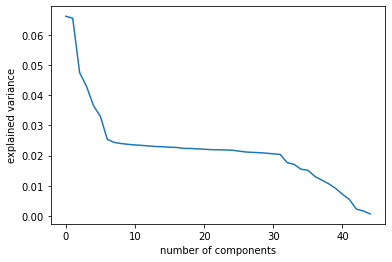

In [214]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [215]:
cov_matrix = np.dot(num_df_normalized.T, num_df_normalized) / df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

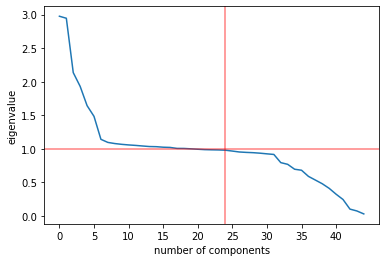

In [216]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1.0, color='r', linestyle='-',alpha=.5)
plt.axvline(x=24, color='r', linestyle='-',alpha=.5)
plt.xticks(np.arange(0,45,step = 5))

plt.show()

In [242]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
         'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18',
        'PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27',
        'PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36',
        'PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45'],
index=num_df.columns)
loadings

PC1       PC2       PC3       PC4       PC5  \
CaseOrder            -0.463204  0.199338  0.145666  0.023656 -0.013964   
State                -0.005345  0.008369  0.006718 -0.124686  0.067230   
Zip                  -0.003487 -0.019887 -0.054148  0.690796  0.054087   
Lat                   0.012106 -0.007323  0.002373  0.007637  0.038872   
Lng                   0.002720  0.018654  0.056539 -0.691511 -0.066109   
Population           -0.002945 -0.001747 -0.015207  0.085267 -0.011851   
Area                 -0.010347  0.016880  0.002445 -0.010442 -0.012264   
Timezone             -0.003949 -0.009609  0.002474  0.020437  0.086043   
Children              0.003256 -0.000747 -0.004847 -0.035883  0.008074   
Age                   0.006728  0.002203  0.007091 -0.000026 -0.018627   
Education             0.007968 -0.005331  0.002403 -0.011703  0.006274   
Employment            0.018623  0.001790 -0.016691  0.007372 -0.015464   
Income                0.000201 -0.000962 -0.005115  0.001848  0.025154   
Marital               0.001843 -0.008362  0.013606 -0.006334 -0.009379   
Gender               -0.000305  0.013156 -0.019907  0.017955  0.006345   
Churn                 0.356930 -0.167611  0.250803  0.029952  0.011768   
Outage_sec_perweek   -0.008565 -0.011046  0.077654  0.010573 -0.035768   
Email                 0.015213  0.002616  0.000169 -0.009003 -0.009674   
Contacts             -0.004486 -0.007483  0.009378 -0.010819 -0.009065   
Yearly_equip_failure -0.012237 -0.002581 -0.006008  0.010755  0.006013   
Techie               -0.004360 -0.004758  0.015766  0.016761  0.019620   
Contract             -0.054153  0.027791 -0.038029 -0.024293  0.014504   
Port_modem           -0.003546  0.002412  0.005823  0.014365 -0.011981   
Tablet                0.007041  0.015074  0.013285 -0.019994 -0.007270   
InternetService       0.021848  0.004211  0.174519 -0.016914  0.004400   
Phone                -0.012995  0.006014 -0.015126 -0.019901  0.041889   
Multiple              0.042725 -0.021459  0.249771  0.034378  0.016585   
OnlineSecurity       -0.005112  0.003299  0.037595 -0.004930 -0.012040   
OnlineBackup          0.000454 -0.006431  0.171221 -0.007932  0.021313   
DeviceProtection      0.031425 -0.017808  0.115335 -0.025193  0.011878   
TechSupport           0.016097  0.009773  0.032968  0.022460 -0.000523   
StreamingTV           0.051065 -0.026505  0.328969  0.047691 -0.011344   
StreamingMovies       0.073178 -0.044190  0.417201  0.025924  0.009039   
PaperlessBilling      0.004755  0.003750  0.001424  0.000987 -0.009624   
Tenure               -0.490438  0.211077  0.143420  0.018163 -0.013335   
MonthlyCharge         0.101121 -0.051095  0.650638  0.046091  0.011210   
Bandwidth_GB_Year    -0.479868  0.203461  0.188918  0.023361 -0.014410   
item1                 0.180806  0.421574  0.011757 -0.018346  0.279040   
item2                 0.162943  0.402175  0.006748 -0.001594  0.283096   
item3                 0.151874  0.370740 -0.003899 -0.016387  0.279430   
item4                 0.067795  0.129164  0.001792  0.044482 -0.562961   
item5                -0.090929 -0.151104 -0.006812 -0.043551  0.581260   
item6                 0.167765  0.367761  0.008407  0.038166 -0.178546   
item7                 0.140624  0.329112 -0.001352  0.022537 -0.175883   
item8                 0.133827  0.277882  0.007149  0.022864 -0.132730   

                           PC6       PC7       PC8       PC9      PC10  \
CaseOrder             0.006401 -0.101411 -0.023709 -0.013618  0.002237   
State                 0.532953  0.068888 -0.155327  0.052904 -0.161549   
Zip                  -0.001382  0.017259  0.023406  0.010472  0.001164   
Lat                   0.496787 -0.064811  0.211797 -0.084156  0.162291   
Lng                  -0.118330 -0.031732 -0.005453 -0.009231  0.016297   
Population           -0.441949  0.133371 -0.180427  0.038162 -0.215242   
Area                 -0.003176  0.033334 -0.036334  0.366335 -0.072112   
Timezone              0.485504

#### PC1 
**0.490438	CaseOrder**<br>
**0.479868	State**<br>
**0.463204	Zip**<br>
**0.356930	Lng**<br>
#### PC2
**0.421574	CaseOrder**<br>
**0.402175	State**<br>
**0.370740	Zip**<br>
**0.367761	Lat**<br>
**0.329112	Lng**<br>
**0.277882	Population**<br>
#### PC3
**0.650638	CaseOrder**<br>
**0.417201	State**<br>
**0.328969	Zip**<br>
**0.250803	Lat**<br>
**0.249771	Lng**<br>
#### PC4
**0.691511	CaseOrder**<br>
**0.690796	State**<br>
#### PC5
**0.581260	CaseOrder**<br>
**0.562961	State**<br>
**0.283096	Zip**<br>
**0.279430	Lat**<br>
**0.279040	Lng**<br>

In [257]:
PC_1 = pd.DataFrame(loadings.index.values,sorted(abs(loadings['PC1']),reverse=True))
PC_2 = pd.DataFrame(loadings.index.values,sorted(abs(loadings['PC2']),reverse=True))
PC_3 = pd.DataFrame(loadings.index.values,sorted(abs(loadings['PC3']),reverse=True))
PC_4 = pd.DataFrame(loadings.index.values,sorted(abs(loadings['PC4']),reverse=True))
PC_5 = pd.DataFrame(loadings.index.values,sorted(abs(loadings['PC5']),reverse=True))


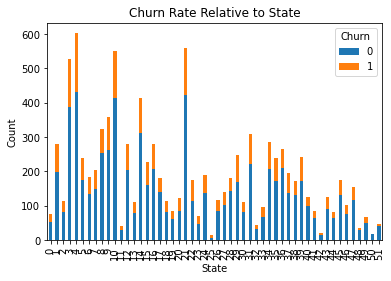

In [239]:
cust_serv_churn = pd.crosstab(df['State'], df['Churn'])
cust_serv_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('State')
plt.title('Churn Rate Relative to State')
plt.show()

# Part IV. Supporting Documents

## F.  Provide a Panopto recording that demonstrates the warning- and error-free functionality of the code used to support the discovery of anomalies and the data cleaning process and summarizes the programming environment.
 

Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access", and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.
 

To submit your recording, upload it to the Panopto drop box titled “Data Cleaning – NUM2 \ D206” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.

## G.  Reference the web sources used to acquire segments of third-party code to support the application. Be sure the web sources are reliable.

## H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

## I.  Demonstrate professional communication in the content and presentation of your submission.